# Homework 1
IDS 576 <br>
Name: Isaac Salvador <br>
Email: isalva2@uic.edu <br>
UIN: 6669845132 <br>

## **1. Backpropogation**

### Computational Graph

The multivariable equation $f(a,b,c,d,e) = \frac{1}{(1+(a^b + c^d)*e)^2}$ can be expressed with the following computational graph:

<img src="https://github.com/Team4IDS576/homework-assignments/blob/Isaac-Salvador-Colab/Misc_files/HW1_Fig1.png?raw=1" width="800" />

This graph begins with inputs $ a,b,c,d,e $ and terminates with the function in question.

This graph was created in [figma](https://www.figma.com/).


### Gradient Computation

We wish to compute the gradient of $f$:
 $$ \nabla f = \left(\frac{\partial f}{\partial a},\frac{\partial f}{\partial b},\frac{\partial f}{\partial c},\frac{\partial f}{\partial d},\frac{\partial f}{\partial e} \right)$$
 via the **chain rule**. The first step is to compute the partial derivatives of the **compute nodes** with respect to their inputs.

For the last compute node (let us define it as _node_ $F$),  we compute the partial derivative $ \frac{\partial f}{\partial i}$ w.r.t. $i$ as:


$$ \frac{\partial f}{\partial i} = -\frac{2}{(1+i)^3} $$

Implemented in python, we get:

In [68]:
# import math and numpy
import math
import numpy as np

# assign input values
a,b,c,d,e = 1,1,1,1,1

# calculate the value of i
i = (a**b + c**d)*e

# compute the partial derivative df/di
def dF_di(i):
    return -2/(1+i)**2

We can then obtain the partial derivates for the rest of the **compute nodes** w.r.t. their inputs:

In [69]:
# di/dh
h = a**b + c**d

def di_dh(e,h):
    return e

# di/de
def di_de(e,h):
    return h

# dh/df
def dh_df():
    return 1

# dh/dg
def dh_dg():
    return 1

# note that partial derivatives w.r.t f & g are linear and equate to 1

# df/da
def df_da(a,b):
    return b*a**(b-1)

# df/db
def df_db(a,b):
    return np.log(a)*a**b

# dg/dc
def dg_dc(c,d):
    return d*c**(d-1)

# dg/dd
def dg_dd(c,d):
    return np.log(c)*c**d


The first partial derivative $\frac{\partial f}{\partial a}$ can now be calculated:

$$ \frac{\partial f}{\partial a} = \frac{\partial F}{\partial i}\frac{\partial i}{\partial h}\frac{\partial h}{\partial f}\frac{\partial f}{\partial a} $$

In python:

In [70]:
partial_a = dF_di(i)*di_dh(e,h)*dh_df()*df_da(a,b)

print(partial_a)

-0.2222222222222222


and summarily:

In [71]:
# compute partial derivatives w.r.t. b, c, d & e
partial_b = dF_di(i)*di_dh(e,h)*dh_df()*df_db(a,b)

partial_c = dF_di(i)*di_dh(e,h)*dh_dg()*dg_dc(c,b)

partial_d = dF_di(i)*di_dh(e,h)*dh_dg()*dg_dd(c,d)

partial_e = dF_di(i)*di_de(e,h)

# summary
gradient = [partial_a, partial_b, partial_c, partial_d, partial_e]

# chr index for summary
char = 97

print("Summary of Gradient:\n")

for partial in gradient:
    print(f"Partial derivative {chr(char)}: {format(partial, '.6f')}")
    char += 1

print(f"\nGradient of f(1,1,1,1,1) = {sum(gradient)}")



Summary of Gradient:

Partial derivative a: -0.222222
Partial derivative b: -0.000000
Partial derivative c: -0.222222
Partial derivative d: -0.000000
Partial derivative e: -0.444444

Gradient of f(1,1,1,1,1) = -0.8888888888888888


## **2. Gradient Descent**

### MSE Function

We wish to define a function in python that calculates _Mean Square Error_, defined by the following function:

$$ MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $$

In python:

In [72]:
def MSE(true, pred):

    # user input error
    if len(true) != len(pred):
        print("Arrays are not the same size!")

    # obtain sum of squares
    sum_squares = np.square(true-pred)

    # calculate MSE
    mse = np.sum(sum_squares)/len(true)

    return mse

Functionality test:

In [73]:
# initialize sample data obtained from statology.org
observed = np.array([34, 37, 44, 47, 48, 48, 46, 43, 32, 27, 26, 24])
predicted = np.array([37, 40, 46, 44, 46, 50, 45, 44, 34, 30, 22, 23])

# compute MSE
print(MSE(observed, predicted))

5.916666666666667


**Note**: the MSE Function computes the same answer as the generated answer by the statology.org [MSE Calculator](https://www.statology.org/mse-calculator/).


### Linear Model


For the linear model $ y = mx+c $, where the model parameters $m = 1$, $c = 0$, and $ x \in (0,1) $, the plot looks like this:

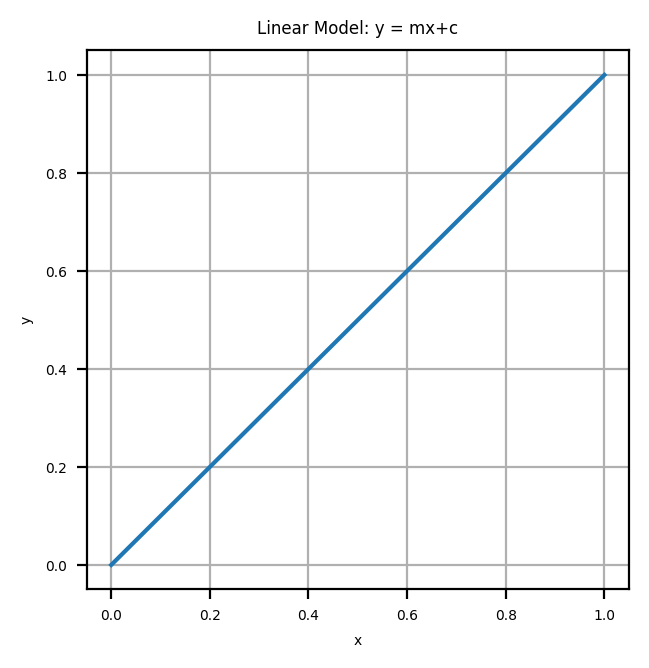

In [74]:
# import matplotlib
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 5})

# initalize model parameters
m = 1
c = 0

# obtain x and y values for the plot
x = np.linspace(0,1,2)
y = m*x+c

# plot linear model
fig, ax = plt.subplots(figsize=(3.5,3.5), dpi=200)
ax.plot(x, y)
ax.set_title("Linear Model: y = mx+c")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.grid(True)

### Generate Example Data

We can now generate example data using `numpy`'s `random` module.

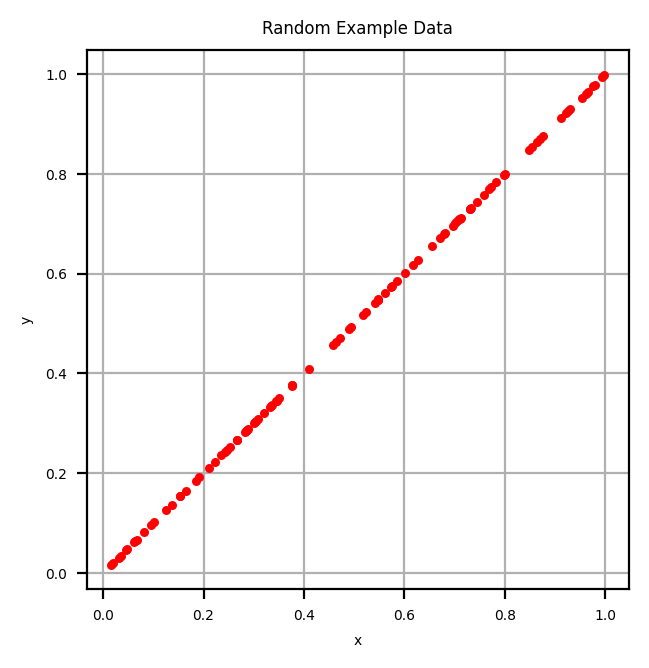

In [75]:
# initialize seed for reproducibility
np.random.seed(567)

# create random example data
x_example = np.random.rand(100)
y_example = m*x_example+c

# plot linear model
fig, ax = plt.subplots(figsize=(3.5, 3.5), dpi=200)
ax.scatter(x_example, y_example, zorder=1, c="r", s = 5)
ax.set_title("Random Example Data")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.grid(True)
ax.set_axisbelow(1)

### Linear Gradient Descent

For the linear model with unknown parameters $m$ and $c$, let us outline the **Gradient Descent** algorithm we shall employ. I implemented this [tutorial](https://towardsdatascience.com/linear-regression-using-gradient-descent-97a6c8700931) as a guide.

1. Assign a random value to $m$ and $c$ such that $ m \in [0,1] $ and $ c \in [0,1] $.
2. Choose the learning rate $\alpha$.
3. Compute the partial derivates of the MSE loss function $ \frac{\partial L}{\partial m} $ and $ \frac{\partial L}{\partial c} $. More formally:

    $$ \frac{\partial \text{L}}{\partial m} = -\frac{2}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i) x_i $$
    $$ \frac{\partial \text{L}}{\partial c} = -\frac{2}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i) $$

4. Update the values of $m$ and $c$ in the direction of their respective partial derivative such that

    $$ m_{n+1} = m_{n} - \alpha_{n}\frac{\partial L}{\partial m} $$
    $$ c_{n+1} = c_{n} - \alpha_{n}\frac{\partial L}{\partial c} $$


5. Iterate this process for a set number of epochs or until a desireable loss value is achieved (we will implement the former).

To perform this task lets create a python `class` with the following inputs:

- `np.array`: input data _x_ and _y_
- `float`: random initial starting parameters _m_ and _c_ between [0,1]
- `float`: learning rate _lr_
- `float`: learning rate _alpha_
- `int`: number of _epochs_
- `object`: partial derivatives of _m_ and _c_

In [76]:
# create partial derivative function w.r.t. m
def LinearPartialM(x: np.array, y : np.array, yHat: np.array):

    return (-2/len(y))*np.sum((y-yHat)*x)

# create partial derivative functino w.r.t. c
def LinearPartialC(y : np.array, yHat: np.array):

    return (-2/len(y))*np.sum(y-yHat)


# create Gradient Descent Class
class GradientDescent:
    def __init__(self,
                 x_example: np.array,
                 y_example: np.array,
                 lr: float,
                 epochs: int,
                 dLdm: object,
                 dLdc: object,
                 seed: int):

        # input variables
        self.xTrue = x_example # input x
        self.yTrue = y_example # input y
        self.learningRate = lr # learning rate
        self.numEpochs = epochs # number of epochs
        self.partialM = dLdm # partial w.r.t. m
        self.partialC = dLdc # partial w.r.t. c
        self.seed = seed # random seed for reproducibility

        # variables to be populated after runtime
        self.m = 0
        self.c = 0
        self.loss = 0

        # tracking metrics
        self.lossHistory = []

    # run gradient descent
    def start(self):

        # initialzie index
        i = 0

        # generate random values for m and c
        np.random.seed(self.seed)
        self.m = np.random.rand()
        self.c = np.random.rand()

        # begin Gradient Descent algorithm
        while i < self.numEpochs:

            # obtain predictions based on current m and c
            yHat = self.m*self.xTrue + self.c

            # update parameters
            self.m +=  -1*self.learningRate*self.partialM(self.xTrue, self.yTrue, yHat)
            self.c += -1*self.learningRate*self.partialC(self.yTrue, yHat)

            # update loss value
            self.loss = MSE(self.yTrue, yHat)
            self.lossHistory.append(self.loss)

            if i % 10 == 0:
                print(f"epoch: {i}, loss: {self.loss.round(10)}, m: {self.m.round(5)}, c: {self.c.round(5)}")

            i += 1

        print(f"\nTraining Summary ({i} epochs): loss: {self.loss.round(10)}, m: {self.m.round(5)}, c: {self.c.round(5)}")

    def history(self):
        return self.lossHistory, self.learningRate, self.m, self.c


Now we initialize an instance of the `GradientDescent` class and run the `start()` method.

In [77]:
# instantiate a GradientDescent instance
LinearModel1 = GradientDescent(x_example, y_example, 0.5, 200, LinearPartialM, LinearPartialC, 576)

# run the algorithm
LinearModel1.start()

epoch: 0, loss: 0.5503705653, m: 0.30405, c: 0.17979
epoch: 10, loss: 0.0094255094, m: 0.68943, c: 0.16335
epoch: 20, loss: 0.0023711224, m: 0.84423, c: 0.08193
epoch: 30, loss: 0.0005964899, m: 0.92187, c: 0.04109
epoch: 40, loss: 0.0001500556, m: 0.96081, c: 0.02061
epoch: 50, loss: 3.77486e-05, m: 0.98035, c: 0.01034
epoch: 60, loss: 9.4962e-06, m: 0.99014, c: 0.00518
epoch: 70, loss: 2.3889e-06, m: 0.99506, c: 0.0026
epoch: 80, loss: 6.01e-07, m: 0.99752, c: 0.0013
epoch: 90, loss: 1.512e-07, m: 0.99876, c: 0.00065
epoch: 100, loss: 3.8e-08, m: 0.99938, c: 0.00033
epoch: 110, loss: 9.6e-09, m: 0.99969, c: 0.00016
epoch: 120, loss: 2.4e-09, m: 0.99984, c: 8e-05
epoch: 130, loss: 6e-10, m: 0.99992, c: 4e-05
epoch: 140, loss: 2e-10, m: 0.99996, c: 2e-05
epoch: 150, loss: 0.0, m: 0.99998, c: 1e-05
epoch: 160, loss: 0.0, m: 0.99999, c: 1e-05
epoch: 170, loss: 0.0, m: 1.0, c: 0.0
epoch: 180, loss: 0.0, m: 1.0, c: 0.0
epoch: 190, loss: 0.0, m: 1.0, c: 0.0

Training Summary (200 epochs): l

Our completed linear model is $ y = 1.0x + 0.0 $.

### Plotting the error

We will know instatiate a second `GradientDescent` object with a different `lr` parameter and plot the error for the two objects.

In [78]:
# create second linear model
LinearModel2 = GradientDescent(x_example, y_example, 0.01, 200, LinearPartialM, LinearPartialC, 576)

# run the algorithm
LinearModel2.start()

epoch: 0, loss: 0.5503705653, m: 0.62717, c: 0.89935
epoch: 10, loss: 0.3445637126, m: 0.57077, c: 0.7708
epoch: 20, loss: 0.2205747043, m: 0.52891, c: 0.67019
epoch: 30, loss: 0.1457405002, m: 0.49831, c: 0.59125
epoch: 40, loss: 0.1004413013, m: 0.47641, c: 0.52912
epoch: 50, loss: 0.0728919338, m: 0.46121, c: 0.48003
epoch: 60, loss: 0.0560132147, m: 0.4512, c: 0.44105
epoch: 70, loss: 0.0455526911, m: 0.44518, c: 0.40993
epoch: 80, loss: 0.0389558344, m: 0.44224, c: 0.38491
epoch: 90, loss: 0.0346880055, m: 0.44164, c: 0.36463
epoch: 100, loss: 0.0318271826, m: 0.44286, c: 0.34803
epoch: 110, loss: 0.0298193282, m: 0.44545, c: 0.33429
epoch: 120, loss: 0.028331445, m: 0.44908, c: 0.32279
epoch: 130, loss: 0.0271633124, m: 0.4535, c: 0.31304
epoch: 140, loss: 0.0261944696, m: 0.45851, c: 0.30464
epoch: 150, loss: 0.0253523695, m: 0.46396, c: 0.29732
epoch: 160, loss: 0.0245932505, m: 0.46972, c: 0.29082
epoch: 170, loss: 0.023890646, m: 0.47571, c: 0.28499
epoch: 180, loss: 0.023228

We can now leverage the use of the `history()` method to obtain the errors of each model. MSE error is plotted in Log scale for clarity.

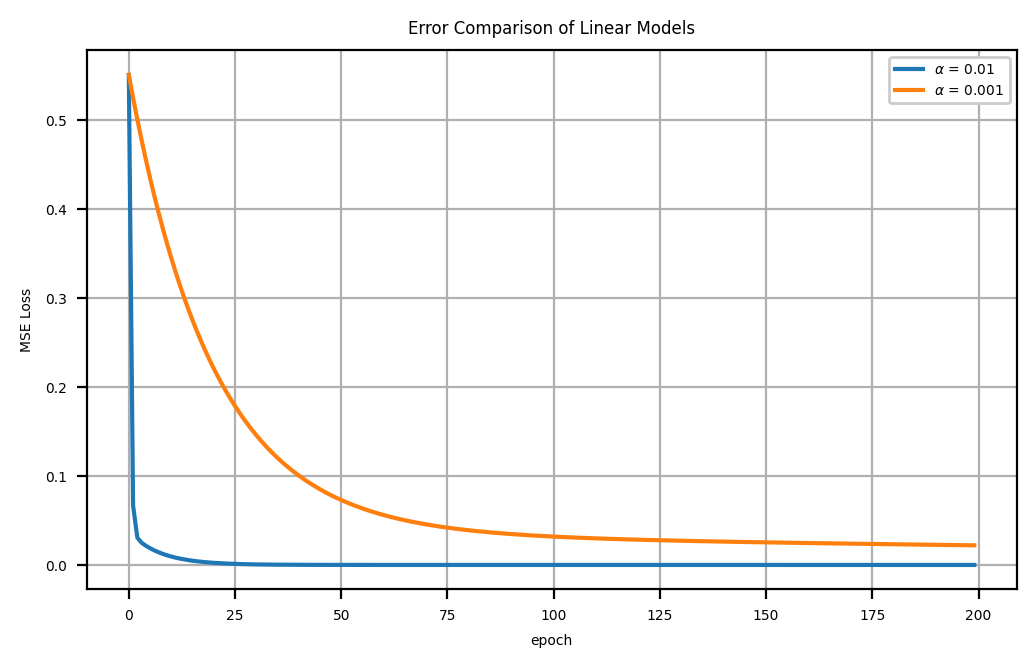

In [79]:
# obtain training history for both models
history1 = LinearModel1.history()
history2 = LinearModel2.history()

# plotting the errors
# plot linear model
fig, ax = plt.subplots(figsize=(6,3.5), dpi=200)
ax.plot(history1[0], label = r'$\alpha$ = 0.01')
ax.plot(history2[0], label = r'$\alpha$ = 0.001')
ax.set_title("Error Comparison of Linear Models")
ax.set_xlabel('epoch')
ax.set_ylabel('MSE Loss')
ax.legend()
ax.legend().get_frame().set_alpha(1.0)
ax.grid(True)

### Quadratic Gradient Descent

For the quadratic model $y = m_1 x + m_2 x^2 +c $, we obtain the following MSE loss function:

$$ \text{L} = \frac{1}{n} \sum_{i=1}^{n} (y_i - (m_1 x + m_2 x^2 +c))^2 $$

With the following partial derivatives:

$$ \frac{\partial L}{\partial m_1} = -\frac{2}{n} \sum_{i=1}^{n} (y_i - (m_1 x + m_2 x^2 + c)) x = -\frac{2}{n} \sum_{i=1}^{n} (y_i - \hat{y_i}) x $$

$$ \frac{\partial L}{\partial m_2} = -\frac{2}{n} \sum_{i=1}^{n} (y_i - (m_1 x + m_2 x^2 + c)) x^2 = -\frac{2}{n} \sum_{i=1}^{n} (y_i - \hat{y_i}) x^2$$

$$ \frac{\partial L}{\partial c} = -\frac{2}{n} \sum_{i=1}^{n} (y_i - (m_1 x + m_2 x^2 + c)) = -\frac{2}{n} \sum_{i=1}^{n} (y_i - \hat{y_i}) $$

In python:

In [80]:
# partial derivative w.r.t. m_1
def QuadraticPartialM1(x: np.array, y : np.array, yHat: np.array):
    return (-2/len(x))*np.dot(y-yHat,x)

def QuadraticPartialM2(x: np.array, y : np.array, yHat: np.array):
    return (-2/len(x))*np.dot(y-yHat,np.square(x))

def QuadraticPartialC(y : np.array, yHat: np.array):
    return (-2/len(y))*np.sum(y-yHat)

We can now modify the `GradientDescent` class to account for the third partial derivative.

In [81]:
# create Quadratic Gradient Descent Class
class QuadraticGradientDescent:
    def __init__(self,
                 x_example: np.array,
                 y_example: np.array,
                 lr: float,
                 epochs: int,
                 partialM1: object,
                 partialM2: object,
                 partialC: object,
                 seed: int):

        # input variables
        self.xTrue = x_example # input x
        self.yTrue = y_example # input y
        self.learningRate = lr # learning rate
        self.numEpochs = epochs # number of epochs
        self.partialM1 = partialM1 # partial w.r.t. m1
        self.partialM2 = partialM2 # partial w.r.t. m2
        self.partialC = partialC # partial w.r.t. c
        self.seed = seed # random seed for reproducibility

        # tracking metrics
        self.lossHistory = []

    # run gradient descent
    def start(self):

        # initialzie index
        i = 0

        # generate random values for m and c
        np.random.seed(self.seed)
        self.m1 = np.random.rand()
        self.m2 = np.random.rand()
        self.c = np.random.rand()

        # begin Gradient Descent algorithm
        print(f"Initial Parameters: m1: {self.m1}, m2: {self.m2}, c: {self.c}\n")

        while i < self.numEpochs:

            # obtain predictions based on current m1, m2, and c
            yHat = self.m1*self.xTrue + self.m2*np.square(self.xTrue)+self.c

            # update parameters
            self.m1 +=  -1*self.learningRate*self.partialM1(self.xTrue, self.yTrue, yHat)
            self.m2 +=  -1*self.learningRate*self.partialM2(self.xTrue, self.yTrue, yHat)
            self.c += -1*self.learningRate*self.partialC(self.yTrue, yHat)

            # update loss value
            self.loss = MSE(self.yTrue, yHat)
            self.lossHistory.append(self.loss)

            if i % 10 == 0:
                print(f"epoch: {i}, loss: {self.loss.round(10)}, m1: {self.m1.round(5)}, m2: {self.m2.round(5)}, c: {self.c.round(5)}")

            i += 1

        print(f"\nTraining Summary ({i} epochs): loss: {self.loss.round(10)}, m1: {self.m1.round(5)}, m2: {self.m2.round(5)}, c: {self.c.round(5)}")

    def history(self):
        return self.lossHistory, self.learningRate, self.m1, self.m2, self.c


Now we create sample data and instanstiate instances of the `QuadraticGradientDescent` object to create two models.

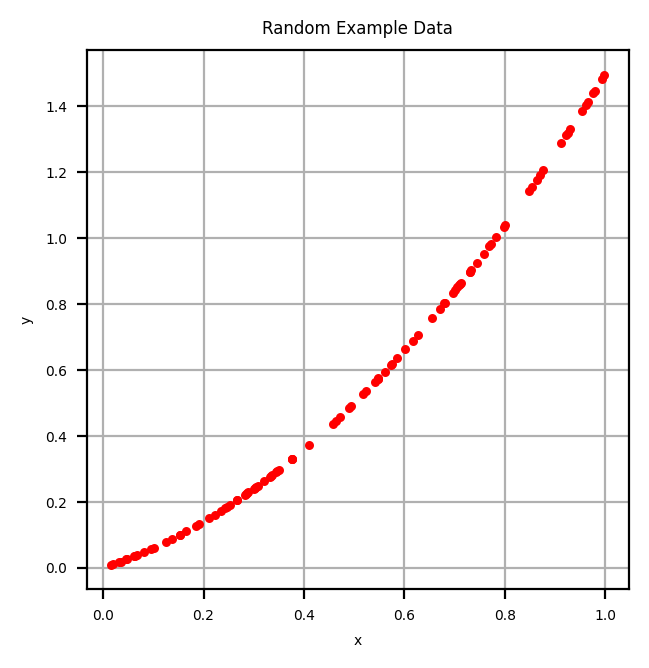

In [82]:
# initialize seed for reproducibility
np.random.seed(567)

m1 = 0.5
m2 = 1.0
c = 0

# create random example data
x_example_quadratic = np.random.rand(100)
y_example_quadratic = m1*x_example_quadratic + m2*x_example_quadratic**2 + c

# plot linear model
fig, ax = plt.subplots(figsize=(3.5, 3.5), dpi=200)
ax.scatter(x_example_quadratic, y_example_quadratic, zorder=1, c="r", s = 5)
ax.set_title("Random Example Data")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.grid(True)
ax.set_axisbelow(1)


In [83]:
# create object
QuadraticModel1 = QuadraticGradientDescent(x_example_quadratic, y_example_quadratic,
                                           0.1,
                                           300,
                                           QuadraticPartialM1,
                                           QuadraticPartialM2,
                                           QuadraticPartialC,
                                           576)

# run algorithm
QuadraticModel1.start()

Initial Parameters: m1: 0.6337605448331272, m2: 0.9140319527336822, c: 0.9137978208648712

epoch: 0, loss: 0.9056425945, m1: 0.53955, m2: 0.85151, c: 0.72349
epoch: 10, loss: 0.0185745316, m1: 0.34439, m2: 0.7447, c: 0.20914
epoch: 20, loss: 0.010418527, m1: 0.37771, m2: 0.79118, c: 0.14784
epoch: 30, loss: 0.0062740964, m1: 0.4106, m2: 0.83222, c: 0.11318
epoch: 40, loss: 0.0037795234, m1: 0.43635, m2: 0.86429, c: 0.08677
epoch: 50, loss: 0.0022773384, m1: 0.45632, m2: 0.88921, c: 0.06631
epoch: 60, loss: 0.0013727439, m1: 0.47178, m2: 0.90857, c: 0.05044
epoch: 70, loss: 0.000828004, m1: 0.48375, m2: 0.92363, c: 0.03812
epoch: 80, loss: 0.0004999601, m1: 0.49301, m2: 0.93535, c: 0.02858
epoch: 90, loss: 0.0003024053, m1: 0.50016, m2: 0.94447, c: 0.02117
epoch: 100, loss: 0.0001834281, m1: 0.50568, m2: 0.95157, c: 0.01543
epoch: 110, loss: 0.0001117686, m1: 0.50994, m2: 0.95712, c: 0.01098
epoch: 120, loss: 6.86029e-05, m1: 0.51321, m2: 0.96145, c: 0.00754
epoch: 130, loss: 4.25955e-0

In [84]:
# create object
QuadraticModel2 = QuadraticGradientDescent(x_example_quadratic, y_example_quadratic,
                                           0.01,
                                           300,
                                           QuadraticPartialM1,
                                           QuadraticPartialM2,
                                           QuadraticPartialC,
                                           576)

# run algorithm
QuadraticModel2.start()

Initial Parameters: m1: 0.6337605448331272, m2: 0.9140319527336822, c: 0.9137978208648712

epoch: 0, loss: 0.9056425945, m1: 0.62434, m2: 0.90778, c: 0.89477
epoch: 10, loss: 0.5256892006, m1: 0.54423, m2: 0.85508, c: 0.73049
epoch: 20, loss: 0.3092160459, m1: 0.48522, m2: 0.81706, c: 0.60523
epoch: 30, loss: 0.1856784656, m1: 0.44208, m2: 0.79007, c: 0.50942
epoch: 40, loss: 0.114983147, m1: 0.41088, m2: 0.77136, c: 0.43585
epoch: 50, loss: 0.0743429888, m1: 0.38864, m2: 0.75884, c: 0.37907
epoch: 60, loss: 0.0508064356, m1: 0.37313, m2: 0.75095, c: 0.33499
epoch: 70, loss: 0.0370117377, m1: 0.36266, m2: 0.74652, c: 0.30052
epoch: 80, loss: 0.0287740048, m1: 0.35595, m2: 0.74466, c: 0.27331
epoch: 90, loss: 0.0237138744, m1: 0.35206, m2: 0.74469, c: 0.25161
epoch: 100, loss: 0.0204781523, m1: 0.35026, m2: 0.74612, c: 0.2341
epoch: 110, loss: 0.0182968846, m1: 0.35, m2: 0.74856, c: 0.21977
epoch: 120, loss: 0.0167316289, m1: 0.35089, m2: 0.75174, c: 0.20786
epoch: 130, loss: 0.01553239

We plot the loss of each quadratic model with the `history` method:

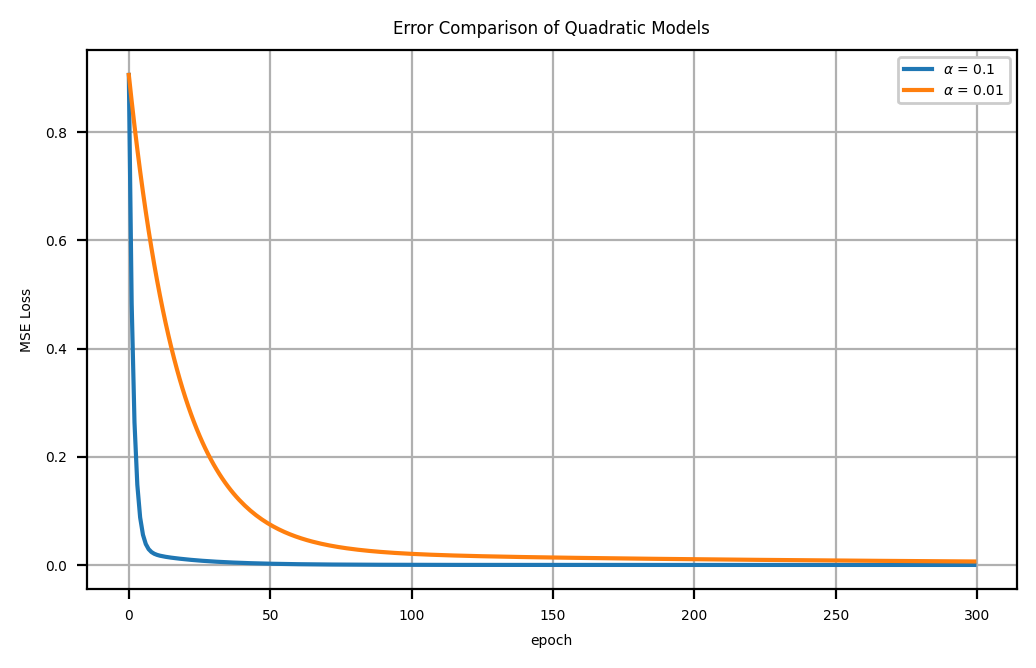

In [85]:
# obtain training history for both models
history1 = QuadraticModel1.history()
history2 = QuadraticModel2.history()

# plotting the errors
# plot linear model
fig, ax = plt.subplots(figsize=(6,3.5), dpi=200)
ax.plot(history1[0], label = r'$\alpha$ = 0.1')
ax.plot(history2[0], label = r'$\alpha$ = 0.01')
ax.set_title("Error Comparison of Quadratic Models")
ax.set_xlabel('epoch')
ax.set_ylabel('MSE Loss')
ax.legend()
ax.legend().get_frame().set_alpha(1.0)
ax.grid(True)

Similarly, the parameters $m_1$, $m_2$, and $c$ are stored in the `history` object and can be used to plot the models against the ground truth model.

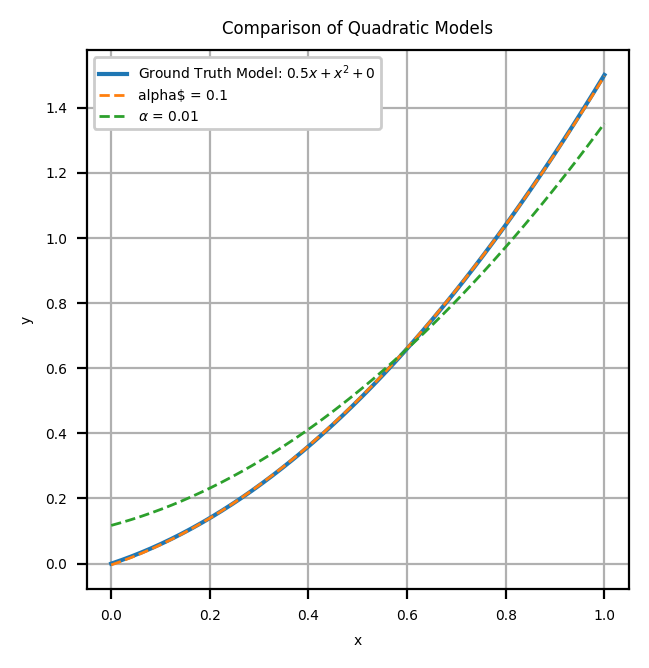

In [86]:
# obtain model parameters
model1 = history1[2:]
model2 = history2[2:]

# ground truth model
truth_model = (0.5,1,0)

# define function for plotting
def model_plotting(model: tuple):

    # create x values
    x = np.linspace(0, 1)

    return x,model[0]*x + model[1]*x**2 + model[2]

# plot linear model
fig, ax = plt.subplots(figsize=(3.5,3.5), dpi=200)

ax.plot(model_plotting(truth_model)[0],
        model_plotting(truth_model)[1],
        label = r'Ground Truth Model: $0.5x+x^2+0$'
        )

ax.plot(model_plotting(model1)[0],
        model_plotting(model1)[1],
        linestyle='dashed',
        label = r'alpha$ = 0.1',
        linewidth = 1)

ax.plot(model_plotting(model2)[0],
        model_plotting(model2)[1],
        linestyle='dashed',
        label = r'$\alpha$ = 0.01',
        linewidth=1)

ax.set_title("Comparison of Quadratic Models")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()
ax.legend().get_frame().set_alpha(1.0)
ax.grid(True)

Gradient Descent techniques for both the Linear and Quadratic models exhibit better accuracy at lower learning rates. Large learning rates and a small number of epochs allows the algorithm to converge on the local minima of the MSE loss function. It is important to note that for both implementations of the gradient descent algorithm learning rates above $ \alpha > 1,0 $ resulted in exploding gradients, making the models unable to learn. Error logs indicate that this is due to out of bound exceptions at run time.

### Hyperbolic Tangent Gradient Descent

For the hyperbolioc tangent model $y = \text{tanh}(m*x+c)$ we obtain example data for $x \in [0.2]$ in the following manner:

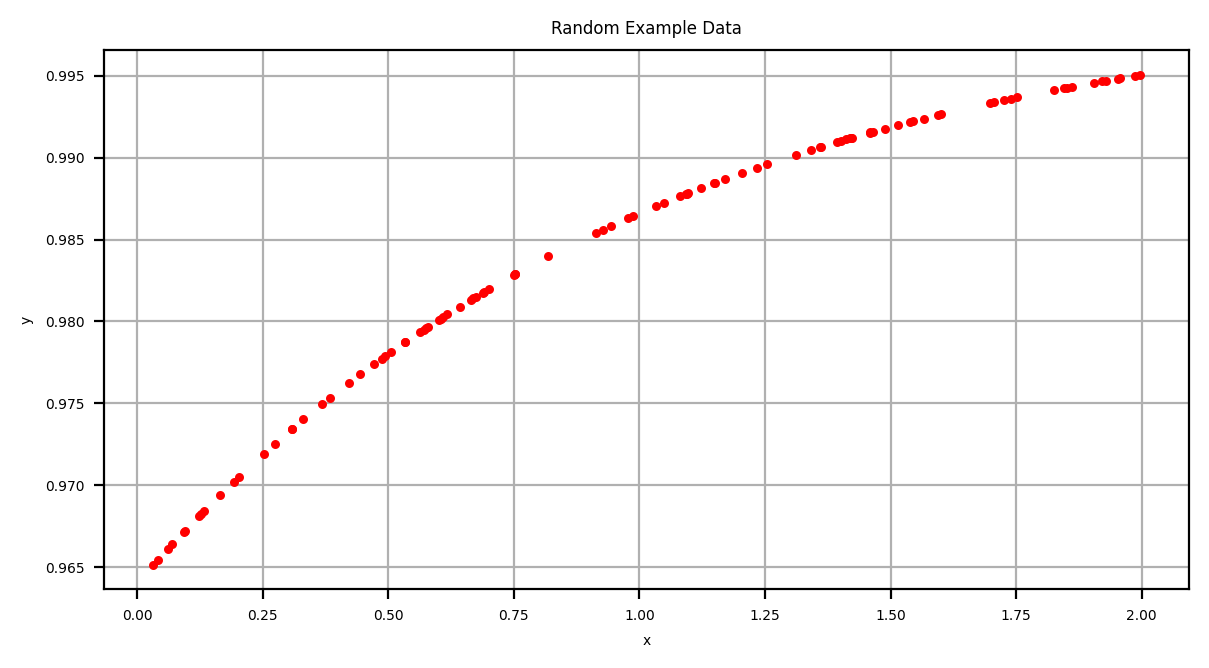

In [87]:
# initialize seed for reproducibility
np.random.seed(567)

# create random example data
x_hyperbolic = 2*np.random.rand(100)
y_hyperbolic = np.tanh(x_example+2)

# plot linear model
fig, ax = plt.subplots(figsize=(7, 3.5), dpi=200)
ax.scatter(x_hyperbolic, y_hyperbolic, zorder=1, c="r", s = 5)
ax.set_title("Random Example Data")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.grid(True)
ax.set_axisbelow(1)

similar to the quadratic mode, we obtain the loss function

$$ \text{L} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \text{tanh}(m*x+c))^2 $$

w.r.t. parameters $c$ and $m$, the partial derivatives are as follows:

$$ \frac{\partial \text{L}}{\partial m} = \frac{2}{n} \sum_{i=1}^{n} (y_i - \tanh(m * x + c)) (1 - \tanh^2(m * x + c)) x = \frac{2}{n} \sum_{i=1}^{n} (y_i - \hat{y_i}) (1 - \hat{y_i}^2)) x$$
$$ \frac{\partial \text{L}}{\partial c} = \frac{2}{n} \sum_{i=1}^{n} (y_i - \tanh(m * x + c)) (1 - \tanh^2(m * x + c)= \frac{2}{n} \sum_{i=1}^{n} (y_i - \hat{y_i}) (1 - \hat{y_i}^2)) $$

Implemented in python:

In [88]:
# partial w.r.t. m
def HyperbolicPartialM(x, y, yHat):
    return (2/len(x))*np.dot(y-yHat, (1 - np.square(yHat)*x))

# partial w.r.t. c
def HyperbolicPartialC(y, yHat):
    return (2/len(y))*np.dot(y-yHat, 1 - np.square(yHat))

We can now leverage a modified `GradientDescent` class to perform the algorithm.

In [89]:
# create Gradient Descent Class
class HyperbolicGradientDescent:
    def __init__(self,
                 x_example: np.array,
                 y_example: np.array,
                 lr: float,
                 epochs: int,
                 dLdm: object,
                 dLdc: object,
                 seed: int):

        # input variables
        self.xTrue = x_example # input x
        self.yTrue = y_example # input y
        self.learningRate = lr # learning rate
        self.numEpochs = epochs # number of epochs
        self.partialM = dLdm # partial w.r.t. m
        self.partialC = dLdc # partial w.r.t. c
        self.seed = seed # random seed for reproducibility

        # variables to be populated after runtime
        self.m = 0
        self.c = 0
        self.loss = 0

        # tracking metrics
        self.lossHistory = []

    # run gradient descent
    def start(self):

        # initialzie index
        i = 0

        # generate random values for m and c
        np.random.seed(self.seed)
        self.m = np.random.rand()
        self.c = np.random.rand()

        # begin Gradient Descent algorithm
        print(f"Initial Parameters: m: {self.m} c: {self.c}\n")

        while i < self.numEpochs:

            # obtain predictions based on current m and c
            yHat = np.tanh(self.m*self.xTrue+self.c)

            # update parameters
            self.m +=  1*self.learningRate*self.partialM(self.xTrue, self.yTrue, yHat)
            self.c += 1*self.learningRate*self.partialC(self.yTrue, yHat)

            # update loss value
            self.loss = MSE(self.yTrue, yHat)
            self.lossHistory.append(self.loss)

            if i % 20 == 0:
                print(f"epoch: {i}, loss: {self.loss.round(10)}, m: {self.m.round(5)}, c: {self.c.round(5)}")

            i += 1

        print(f"\nTraining Summary ({i} epochs): loss: {self.loss.round(10)}, m: {self.m.round(5)}, c: {self.c.round(5)}")

    def history(self):
        return self.lossHistory, self.learningRate, self.m, self.c


In [90]:
HyperbolicModel1 = HyperbolicGradientDescent(x_hyperbolic,
                                   y_hyperbolic,
                                   0.8,
                                   400,
                                   HyperbolicPartialM,
                                   HyperbolicPartialC,
                                   576)

HyperbolicModel1.start()

Initial Parameters: m: 0.6337605448331272 c: 0.9140319527336822

epoch: 0, loss: 0.0126170849, m: 0.70904, c: 0.95649
epoch: 20, loss: 0.0013042466, m: 1.46273, c: 1.20034
epoch: 40, loss: 0.0006682789, m: 1.85625, c: 1.27604
epoch: 60, loss: 0.0004666872, m: 2.13117, c: 1.32135
epoch: 80, loss: 0.000372775, m: 2.34157, c: 1.35354
epoch: 100, loss: 0.0003202143, m: 2.5104, c: 1.37838
epoch: 120, loss: 0.0002874248, m: 2.64988, c: 1.39854
epoch: 140, loss: 0.00026544, m: 2.76737, c: 1.41544
epoch: 160, loss: 0.0002499179, m: 2.86769, c: 1.42997
epoch: 180, loss: 0.0002385219, m: 2.95421, c: 1.44267
epoch: 200, loss: 0.0002298932, m: 3.02939, c: 1.45394
epoch: 220, loss: 0.0002231933, m: 3.09505, c: 1.46405
epoch: 240, loss: 0.0002178798, m: 3.15264, c: 1.47321
epoch: 260, loss: 0.0002135887, m: 3.20327, c: 1.48158
epoch: 280, loss: 0.0002100671, m: 3.24786, c: 1.48927
epoch: 300, loss: 0.0002071355, m: 3.28716, c: 1.49637
epoch: 320, loss: 0.0002046628, m: 3.32178, c: 1.50298
epoch: 340

In [91]:
HyperbolicModel2 = HyperbolicGradientDescent(x_hyperbolic,
                                   y_hyperbolic,
                                   0.01,
                                   400,
                                   HyperbolicPartialM,
                                   HyperbolicPartialC,
                                   576)

HyperbolicModel2.start()

Initial Parameters: m: 0.6337605448331272 c: 0.9140319527336822

epoch: 0, loss: 0.0126170849, m: 0.6347, c: 0.91456
epoch: 20, loss: 0.0117031174, m: 0.65316, c: 0.9248
epoch: 40, loss: 0.0109012423, m: 0.67098, c: 0.93439
epoch: 60, loss: 0.0101926076, m: 0.68823, c: 0.94339
epoch: 80, loss: 0.0095623182, m: 0.70495, c: 0.95188
epoch: 100, loss: 0.0089984548, m: 0.72119, c: 0.9599
epoch: 120, loss: 0.0084913701, m: 0.73698, c: 0.9675
epoch: 140, loss: 0.008033175, m: 0.75237, c: 0.97472
epoch: 160, loss: 0.0076173582, m: 0.76738, c: 0.9816
epoch: 180, loss: 0.0072384996, m: 0.78203, c: 0.98816
epoch: 200, loss: 0.0068920527, m: 0.79635, c: 0.99444
epoch: 220, loss: 0.0065741761, m: 0.81035, c: 1.00044
epoch: 240, loss: 0.0062816037, m: 0.82407, c: 1.0062
epoch: 260, loss: 0.0060115409, m: 0.8375, c: 1.01174
epoch: 280, loss: 0.0057615836, m: 0.85067, c: 1.01706
epoch: 300, loss: 0.0055296526, m: 0.8636, c: 1.02218
epoch: 320, loss: 0.0053139411, m: 0.87628, c: 1.02713
epoch: 340, los

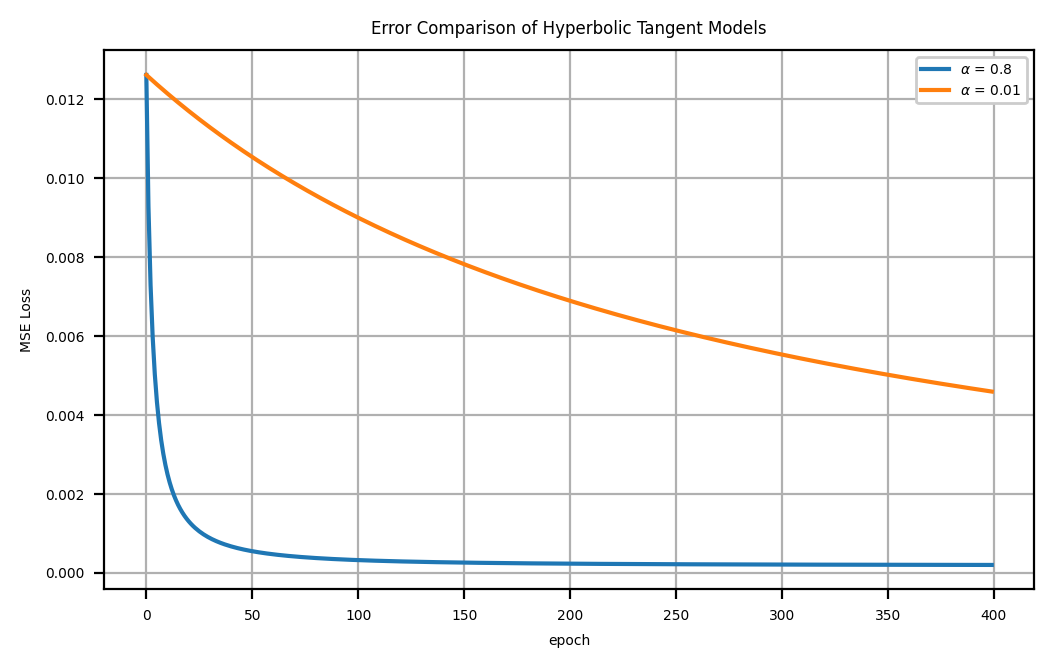

In [92]:
# obtain training history for both models
history1 = HyperbolicModel1.history()
history2 = HyperbolicModel2.history()

# plotting the errors
# plot linear model
fig, ax = plt.subplots(figsize=(6,3.5), dpi=200)
ax.plot(history1[0], label = r'$\alpha$ = 0.8')
ax.plot(history2[0], label = r'$\alpha$ = 0.01')
ax.set_title("Error Comparison of Hyperbolic Tangent Models")
ax.set_xlabel('epoch')
ax.set_ylabel('MSE Loss')
ax.legend()
ax.legend().get_frame().set_alpha(1.0)
ax.grid(True)

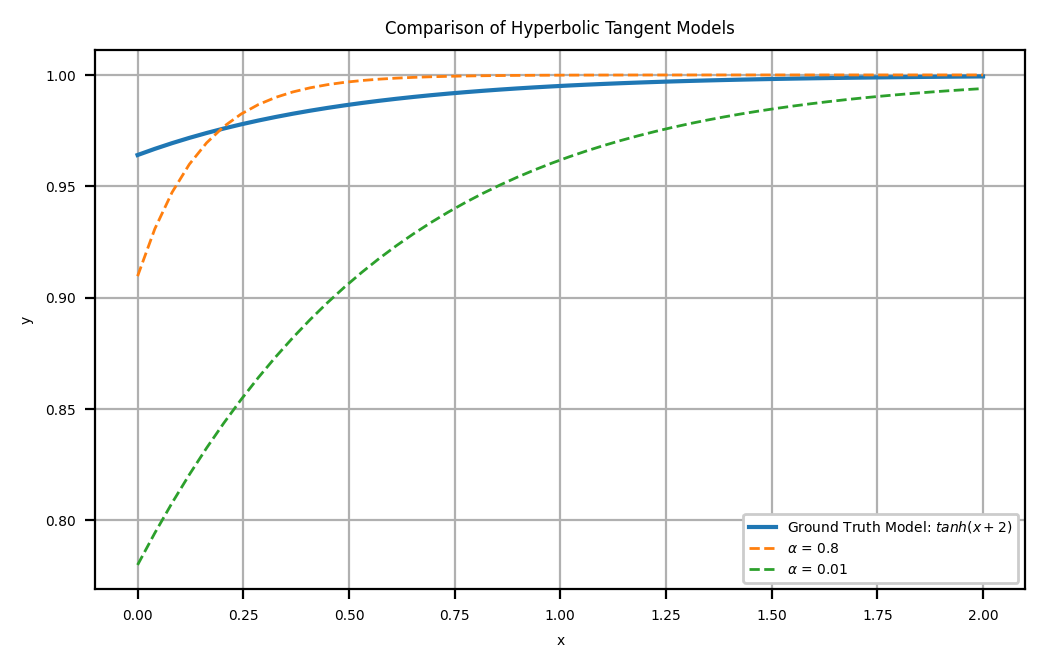

In [93]:
# obtain model parameters
model1 = history1[2:]
model2 = history2[2:]

# ground truth model
truth_model = (1.0,2.0)

# define function for plotting
def model_plotting(model: tuple):

    # create x values
    x = np.linspace(0, 2)

    return x, np.tanh(model[0]*x+model[1])

# plot linear model
fig, ax = plt.subplots(figsize=(6,3.5), dpi=200)

ax.plot(model_plotting(truth_model)[0],
        model_plotting(truth_model)[1],
        label = r'Ground Truth Model: $tanh(x+2)$'
        )


ax.plot(model_plotting(model1)[0],
        model_plotting(model1)[1],
        linestyle='dashed',
        label = r'$\alpha$ = 0.8',
        linewidth = 1)


ax.plot(model_plotting(model2)[0],
        model_plotting(model2)[1],
        linestyle='dashed',
        label = r'$\alpha$ = 0.01',
        linewidth=1)


ax.set_title("Comparison of Hyperbolic Tangent Models")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()
ax.legend().get_frame().set_alpha(1.0)
ax.grid(True)

## **3. ML Basics**

### Logistic (multiclass or cross-entropy) Loss

Begin by downloading the generated data from `Data_Linear_Classifier.ipynb`

(-1.0, 1.0)

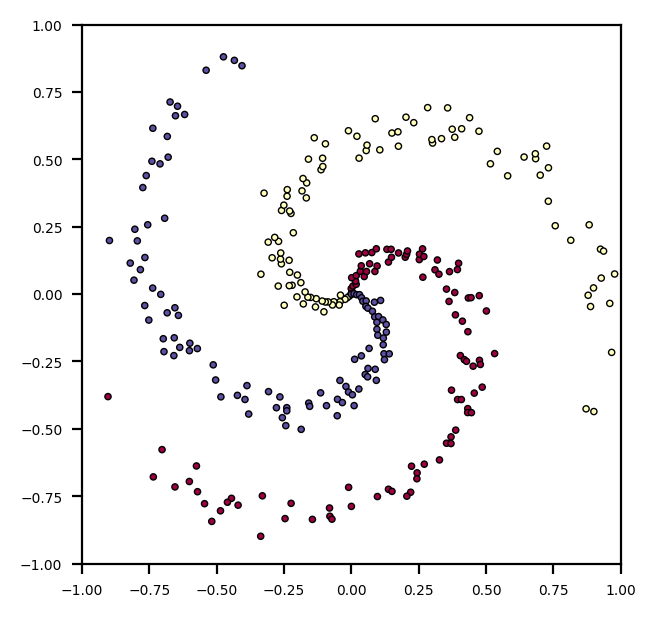

In [94]:
import pickle

X = pickle.load(open('Misc_files/dataX.pickle','rb'))
y = pickle.load(open('Misc_files/dataY.pickle','rb'))

fig, ax = plt.subplots(figsize=(3.5,3.5), dpi=200)
ax.scatter(X[:,0], X[:,1], c=y, s=5, cmap=plt.cm.Spectral, edgecolors="black", linewidth=0.5)
ax.set_aspect('equal')
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)

In addition to the data we initialize random parameters $W$ and $b$ for testing

In [95]:
# random seed for reproducibility
np.random.seed(576)

# get Array W of shape (2, 3)
W = 0.01*np.random.randn(X.shape[1],max(y)+1)

# get Array K of shape (1, 3)
b = np.zeros((1, max(y)+1))

Next build the _cross-entropy_ function with inputs $(X, y, W, b)$

In [96]:
def crossentropy_loss(X, y, W, b):

    # evaluate class scores
    scores = np.dot(X, W) + b

    # compute softmax of scores
    probs = np.exp(scores)/np.sum(np.exp(scores), axis=1, keepdims=True)

    # compute loss
    correct_logprobs = -np.log(probs[range(X.shape[0]),y])
    data_loss = np.sum(correct_logprobs)/X.shape[0]

    return data_loss

# test function
print("loss "+str(crossentropy_loss(X, y, W, b)))

loss 1.0988948999636798


### $l_1$ and $l_2$ Regularization

We can revise the `crossentropy_loss` function by introducing $\text{L}_1$ and $\text{L}_2$ regularization. More formally:

$$ \text{L}_1 = \sum_{i} \sum_{j} |W_{ij}| $$
$$ \text{L}_2 = \sum_{i} \sum_{j} W_{ij}^2 $$

By default, we will initialize function parameters `l1` and `l2` at `0.0`.

In [97]:
def crossentropy_loss_regularization(X, y, W, b, l1=0.0, l2=0.0):

    # evaluate class scores
    scores = np.dot(X, W) + b

    # compute softmax of scores
    probs = np.exp(scores)/np.sum(np.exp(scores), axis=1, keepdims=True)

    # compute l1 and l2 regularizers
    l1_loss = 0.5*l1*np.sum(np.abs(W))
    l2_loss = 0.5*l2*np.sum(np.square(W))

    # compute loss
    correct_logprobs = -np.log(probs[range(X.shape[0]),y])

    # return total loss
    data_loss = np.sum(correct_logprobs)/X.shape[0] - l1_loss - l2_loss

    return data_loss

# test function
print("loss "+str(crossentropy_loss_regularization(X, y, W, b, 1e-3, 1e-3)))

loss 1.0988840322643474


## **4. Classification Pipeline**

### Train Test Splits

We will use the [sci-kit learn](https://scikit-learn.org/stable/) `train_test_split` utility to separate a new instance of the data and recreate a new set of initial $(W, b)$ parameters.

In [98]:
# import utility
from sklearn.model_selection import train_test_split

# reload X and y data from the pickle file
X = pickle.load(open('Misc_files/dataX.pickle','rb'))
y = pickle.load(open('Misc_files/dataY.pickle','rb'))

# random seed for reproducibility
np.random.seed(576)

# get Array W of shape (2, 3)
W = 0.01*np.random.randn(X.shape[1],max(y)+1)

# get Array K of shape (1, 3)
b = np.zeros((1, max(y)+1))

# create test train splits, note shuffling on creation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=576)

### Linear Classifier Construction

Let's build a class to instantiate Linear Classifier models. Per the instructions given in the assignment, `l1` regularization will not be taken as a parameter in the class.

In [99]:
class LinearClassifier:
    def __init__(self, X, y, W, b, lr, epochs, l2 = 1e-3):
        self.X = X.copy()
        self.y = y.copy()
        self.W = W.copy()
        self.b = b.copy()
        self.lr = lr
        self.epochs = epochs
        self.l2 = l2

        # metric tracking
        self.loss = 0
        self.loss_history = []
        self.accuracy_history = []

    # runtime method
    def start(self, verbose = True):

        i = 0

        for i in range(self.epochs):


            # compute the gradient on scores
            num_examples = self.X.shape[0]
            dscores = np.dot(self.X, self.W) + self.b
            dscores[range(num_examples), self.y] -= 1
            dscores /= num_examples

            # backpropogate gradient to parameters (W, b)
            dW = np.dot(self.X.T, dscores)
            db = np.sum(dscores, axis=0, keepdims=True)

            dW += self.l2*self.W # l2 regularization

            # parameter update
            self.W += -self.lr*dW
            self.b += -self.lr*db

            # compute loss, l2 regularization only, and training accuracy
            self.loss = crossentropy_loss_regularization(self.X, self.y, self.W, self.b, 0, self.l2)
            training_accuracy = self.eval(self.X, self.y)

            #metrics
            self.loss_history.append(self.loss)
            self.accuracy_history.append(training_accuracy)

            # output tracking
            if i % 10 == 0 and verbose == True :
                print(f"iteration {i}: loss: {self.loss} training_accuracy: {training_accuracy}")

            i += 1

        # exit output
        if verbose == True:
            print(f"iteration {i}: loss: {self.loss} training_accuracy: {training_accuracy}")

    # get W
    def get_W(self):
        return self.W

    # get b
    def get_b(self):
        return self.b

    # get params as tuple
    def get_parameters(self):
        return self.W, self.b

    # evaluate model
    def eval(self, X = X, y = y):
        scores = np.dot(X, self.W) + self.b
        pred = np.argmax(scores, axis=1)
        return np.mean(pred == y)

    # plot losses
    def show_loss(self):
        fig, ax = plt.subplots(figsize=(6,3.5), dpi=200)
        ax.plot(self.loss_history)
        ax.set_title("Linear Classifier Loss")
        ax.set_xlabel('Epoch')
        ax.set_ylabel('Loss')
        ax.grid(True)

    # plot training accuracy
    def show_accuracy(self):
        fig, ax = plt.subplots(figsize=(6,3.5), dpi=200)
        ax.plot(self.accuracy_history)
        ax.set_title("Linear Classifier Training Accuracy")
        ax.set_xlabel('Epoch')
        ax.set_ylabel('Training Accuracy')
        ax.grid(True)

    # post training
    def show_classifier(self):
        h = 0.02
        x_min, x_max = self.X[:, 0].min() - 1, self.X[:, 0].max() + 1
        y_min, y_max = self.X[:, 1].min() - 1, self.X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                            np.arange(y_min, y_max, h))
        Z = np.dot(np.c_[xx.ravel(), yy.ravel()], self.W) + self.b
        Z = np.argmax(Z, axis=1)
        Z = Z.reshape(xx.shape)
        fig = plt.figure()
        plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
        plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())

    # model summary
    def summary(self):
        print(f"Model summary:"
              +f"\n\nW:\n{self.W}"
              +f"\n\nB:\n{self.b}"
              +f"\n\nLearning Rate: {self.lr}"
              +f"\nl2 Regularization: {self.l2}"
              +f"\nEpochs: {self.epochs}"
              +f"\n\nTraining Accuracy: {self.accuracy_history[-1]}"
              +f"\nModel Loss: {self.loss_history[-1]}")


We next instantiate a `LinearClassifier` model and train it on `X_train`, `y_train`, and inital parameters `W` and `b` using the class method `start()`.

In [100]:
# evaluate on training data
Classifier = LinearClassifier(X_train, y_train, W, b, 1e-3, 200, 1e-3)

# start training
Classifier.start()

iteration 0: loss: 1.098884320032409 training_accuracy: 0.3541666666666667
iteration 10: loss: 1.0985408705616455 training_accuracy: 0.4
iteration 20: loss: 1.0981983208685286 training_accuracy: 0.43333333333333335
iteration 30: loss: 1.0978566669229148 training_accuracy: 0.4666666666666667
iteration 40: loss: 1.0975159047341516 training_accuracy: 0.525
iteration 50: loss: 1.0971760303504645 training_accuracy: 0.5625
iteration 60: loss: 1.0968370398583502 training_accuracy: 0.5833333333333334
iteration 70: loss: 1.0964989293819818 training_accuracy: 0.6
iteration 80: loss: 1.0961616950826265 training_accuracy: 0.6125
iteration 90: loss: 1.095825333158072 training_accuracy: 0.6166666666666667
iteration 100: loss: 1.095489839842064 training_accuracy: 0.6208333333333333
iteration 110: loss: 1.0951552114037537 training_accuracy: 0.625
iteration 120: loss: 1.0948214441471544 training_accuracy: 0.6208333333333333
iteration 130: loss: 1.0944885344106112 training_accuracy: 0.6208333333333333
i

Calling the methods `show_accuracy()` and `show_loss()` the model's training history can now be shown:

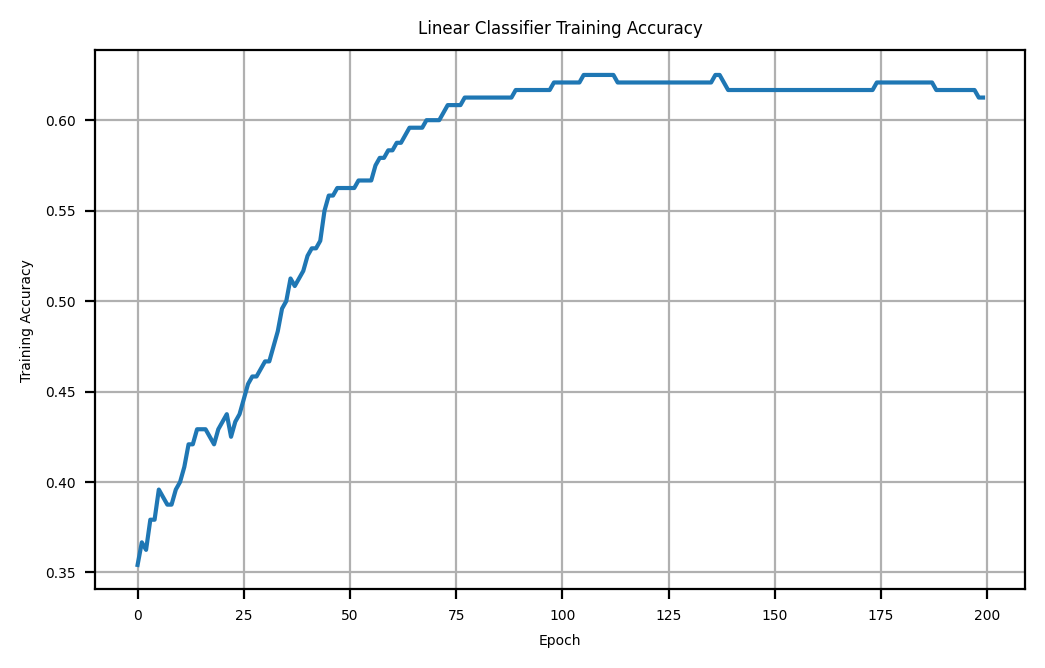

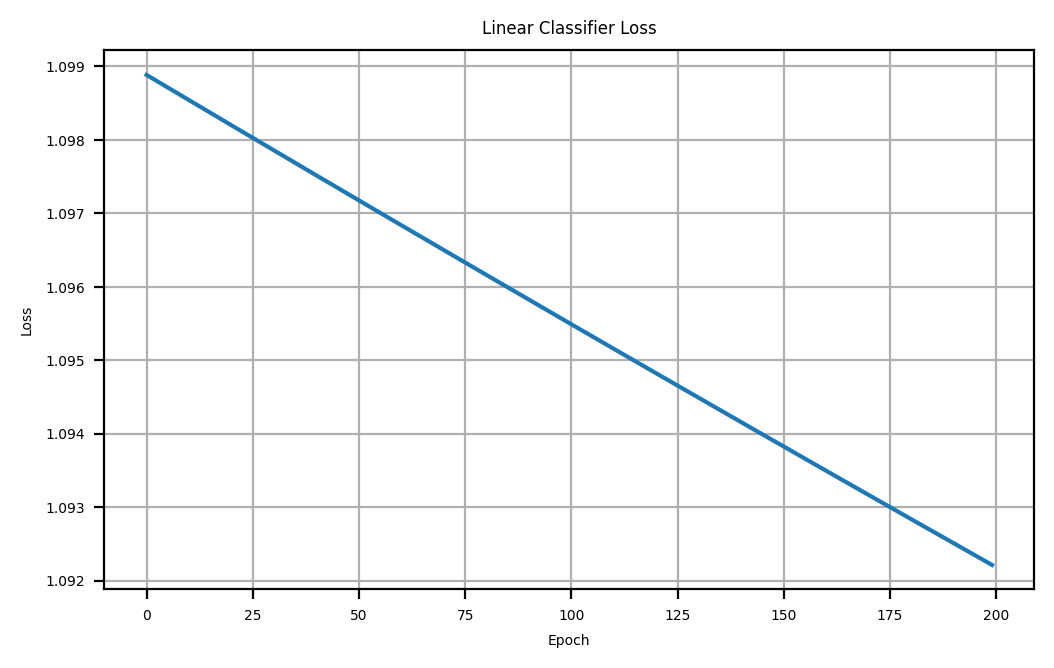

In [101]:
# show training accuracy history
Classifier.show_accuracy()

# show loss history
Classifier.show_loss()

We now call the `summary` method to show the model summary and a `show_classifier()` method to plot the resulting classifier's decision boundary.

Model summary:

W:
[[ 0.01463343  0.01229308 -0.01946041]
 [-0.01563398  0.01509063 -0.00507448]]

B:
[[0.0567085  0.06500469 0.05966792]]

Learning Rate: 0.001
l2 Regularization: 0.001
Epochs: 200

Training Accuracy: 0.6125
Model Loss: 1.0922145395148164


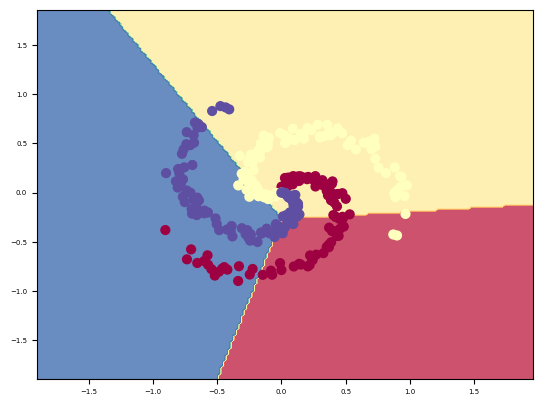

In [102]:
Classifier.summary()
Classifier.show_classifier()

Calling the `eval()` method will evaluate the model on the train and test data.

In [103]:
# get training accuracy
print(f"training accuracy: {Classifier.eval(X_train, y_train)}")

# get testing accuracy
print(f"test accuracy: {Classifier.eval(X_test, y_test)}")

training accuracy: 0.6125
test accuracy: 0.45


A low test accuracy in comparison to the training accuracy typically indicates overfitting, but the radially symmetric distribution of the example data suggests that a linear classifier is not the appropriate choice for this data.

### Cross Validation

For the relatively small number of instances (240) in the training set, we decide to use [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html)'s `KFold` class for cross validation. Cross validation consists of 10 folds.

In [104]:
from sklearn.model_selection import KFold

# set naive parameters for KFold cross validation
lr = 1e-3
epochs = 300
l2 = 1e-3

# tracking objects
training_history = []
validation_history = []
loss_history = []

# best model tracking
best_accuracy = 0.0

# instantiate KFold object
kf = KFold(n_splits = 10)

# begin cv loop
for i, (train_index, validation_index) in enumerate(kf.split(X_train)):

    # instatiate new LinearClassifier object with cv split data
    cv_classifier = LinearClassifier(X_train[train_index], y_train[train_index], W, b, lr, epochs, l2)
    cv_classifier.start(verbose = False)

    # obtain tracking metrics
    training_accuracy = cv_classifier.eval(X_train[train_index], y_train[train_index])
    validation_accuracy = cv_classifier.eval(X_train[validation_index], y_train[validation_index])
    loss = cv_classifier.loss

    # update best model
    if training_accuracy > best_accuracy:
        best_accuracy = training_accuracy
        best_classifier = cv_classifier

    # append metrics
    training_history.append(training_accuracy)
    validation_history.append(validation_accuracy)
    loss_history.append(loss)

# return mean values
mean_cv_training = np.mean(training_history)
mean_cv_validation = np.mean(validation_history)
mean_cv_loss = np.mean(loss_history)

# output
print('Leave One Out Cross-validation results\n'
      f'Mean Training Accuracy: {mean_cv_training}\n'
      f'Mean Validation Accuracy: {mean_cv_validation}\n'
      f'Mean Loss: {mean_cv_loss}')

Leave One Out Cross-validation results
Mean Training Accuracy: 0.5842592592592593
Mean Validation Accuracy: 0.5666666666666667
Mean Loss: 1.088892209841891


Best Model:
Model summary:

W:
[[ 0.02072945  0.01775439 -0.02730493]
 [-0.02166191  0.02486712 -0.00782442]]

B:
[[0.07922916 0.09721065 0.08285023]]

Learning Rate: 0.001
l2 Regularization: 0.001
Epochs: 300

Training Accuracy: 0.6203703703703703
Model Loss: 1.0890753164637825


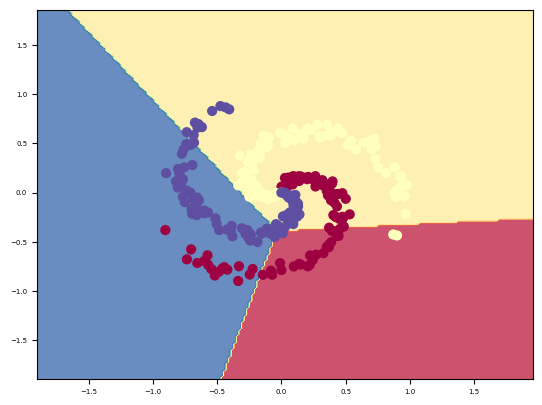

In [105]:
print("Best Model:")
best_classifier.summary()

best_classifier.show_classifier()

### Performance Sensitivity: Learning Rate and Gradient Descent

To evaluate model performance sensitivty on various hyperparameters, we modify the above block of code to perform KFold cross validation on models of varying learning rate and epoch size.

#### Learning Rate Sensitivity

To test the sensitivity of the Linear Classifier, we iteratively test learning rates between `1e-1` to `1e-5` with each instance evaluated through LOO cross-validation.

In [106]:
# initialize parameters for the linear classifier iterations
learning_rates = np.geomspace(1e-1, 1e-5, 5)
epochs = 300
l2 = 1e-3

# instantiate KFold object
kf = KFold(n_splits = 10, shuffle = True, random_state=0)

# initialize tracking objects for each linear classifier
model_training_accuraccies = []
model_validation_accuraccies = []
model_loss = []

# best model tracking
best_accuracy = 0.0

# run first loop to iterate through learning rates
for lr in learning_rates:
    # tracking objects
    training_history = []
    validation_history = []
    loss_history = []

    # begin CV loop
    for i, (train_index, validation_index) in enumerate(kf.split(X_train)):

        # instatiate new LinearClassifier object with cv split data
        cv_classifier = LinearClassifier(X_train[train_index], y_train[train_index], W, b, lr, epochs, l2)
        cv_classifier.start(verbose = False)

        # obtain tracking metrics
        training_accuracy = cv_classifier.eval(X_train[train_index], y_train[train_index])
        validation_accuracy = cv_classifier.eval(X_train[validation_index], y_train[validation_index])
        loss = cv_classifier.loss

        # update best model
        if training_accuracy > best_accuracy:
            best_accuracy = training_accuracy
            best_classifier = cv_classifier

        # append metrics
        training_history.append(training_accuracy)
        validation_history.append(validation_accuracy)
        loss_history.append(loss)

    # return mean values
    mean_cv_training = np.mean(training_history)
    mean_cv_validation = np.mean(validation_history)
    mean_cv_loss = np.mean(loss_history)

    # append mean metrics to overall tracking
    model_training_accuraccies.append(mean_cv_training)
    model_validation_accuraccies.append(mean_cv_validation)
    model_loss.append(mean_cv_loss)

Show best model:

Best Model:
Model summary:

W:
[[ 0.0185787   0.01676259 -0.02987477]
 [-0.02440024  0.02476048 -0.00376098]]

B:
[[0.07812301 0.09605512 0.08516579]]

Learning Rate: 0.001
l2 Regularization: 0.001
Epochs: 300

Training Accuracy: 0.6342592592592593
Model Loss: 1.0886004744877575


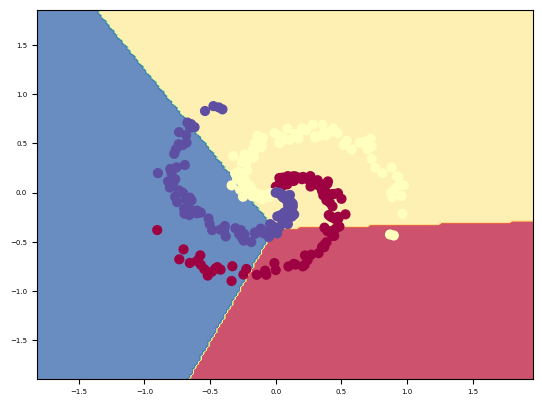

In [107]:
print("Best Model:")
best_classifier.summary()

best_classifier.show_classifier()

We then plot the pertinent metrics for sensitivity analysis.

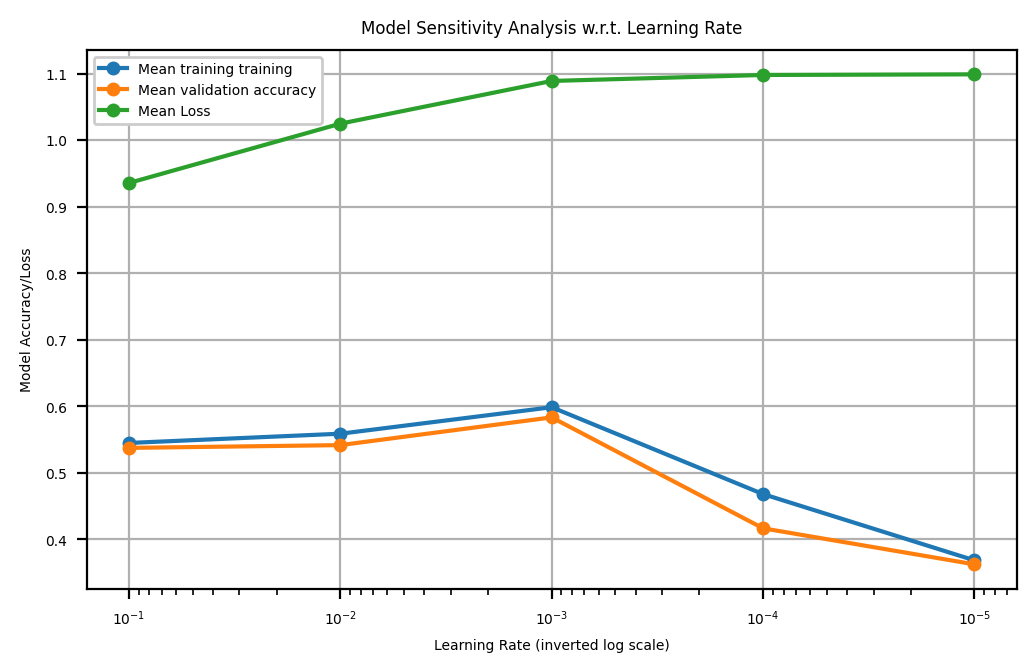

In [108]:
# plot learning rate sensitivity
fig, ax = plt.subplots(figsize=(6,3.5), dpi=200)

ax.plot(learning_rates,
        model_training_accuraccies,
        label = r'Mean training training',
        marker = 'o',
        markersize = 4)

ax.plot(learning_rates,
        model_validation_accuraccies,
        label = r'Mean validation accuracy',
        marker = 'o',
        markersize = 4)

ax.plot(learning_rates,
        model_loss,
        label = r'Mean Loss',
        marker = 'o',
        markersize = 4)

ax.set_title("Model Sensitivity Analysis w.r.t. Learning Rate")
ax.set_xlabel('Learning Rate (inverted log scale)')
ax.set_xscale("log")
ax.invert_xaxis()
ax.set_ylabel('Model Accuracy/Loss')
ax.legend()
ax.legend().get_frame().set_alpha(1.0)
ax.grid(True)

The above plot illustrates the sensitivity of our Linear Classifier Model w.r.t. different learning rates, evaluated on the `X_train` training data and cross validated with 10 splits. A learning rate of `1e-3` yielded the best training and validation accuracy and subsequent smaller learning rates degraded overall model accuracy.

#### Gradient Descent Iteration Sensitivity

Similarly, we perform the same task for the number of gradient descent iterations. The previous best learning rate `1e-3` remains constant in lieu of other hyperparameter tuning schemas such as _grid search_ or _random search_.

In [109]:
# initialize parameters for the linear classifier iterations
lr = 1e-3
various_epochs = np.linspace(100, 1000, 7, dtype=int)
l2 = 1e-3

# instantiate LeaveOneOut object for CV
kf = KFold(n_splits = 10, shuffle = True, random_state=1)

# initialize tracking objects for each linear classifier
model_training_accuraccies = []
model_validation_accuraccies = []
model_loss = []

# best model tracking
best_accuracy = 0.0

# run first loop to iterate through learning rates
for epochs in various_epochs:
    # tracking objects
    training_history = []
    validation_history = []
    loss_history = []

    # begin CV loop
    for i, (train_index, validation_index) in enumerate(kf.split(X_train)):

        # instatiate new LinearClassifier object with cv split data
        cv_classifier = LinearClassifier(X_train[train_index], y_train[train_index], W, b, lr, epochs, l2)
        cv_classifier.start(verbose = False)

        # obtain tracking metrics
        training_accuracy = cv_classifier.eval(X_train[train_index], y_train[train_index])
        validation_accuracy = cv_classifier.eval(X_train[validation_index], y_train[validation_index])
        loss = cv_classifier.loss

        # update best model
        if training_accuracy > best_accuracy:
            best_accuracy = training_accuracy
            best_classifier = cv_classifier

        # append metrics
        training_history.append(training_accuracy)
        validation_history.append(validation_accuracy)
        loss_history.append(loss)

    # return mean values
    mean_cv_training = np.mean(training_history)
    mean_cv_validation = np.mean(validation_history)
    mean_cv_loss = np.mean(loss_history)

    # append mean metrics to overall tracking
    model_training_accuraccies.append(mean_cv_training)
    model_validation_accuraccies.append(mean_cv_validation)
    model_loss.append(mean_cv_loss)

Best Model:
Model summary:

W:
[[ 0.01054313  0.00635041 -0.00866427]
 [-0.00760066  0.00546519 -0.0042355 ]]

B:
[[0.02999379 0.03483221 0.03040347]]

Learning Rate: 0.001
l2 Regularization: 0.001
Epochs: 100

Training Accuracy: 0.6435185185185185
Model Loss: 1.0955903096970332


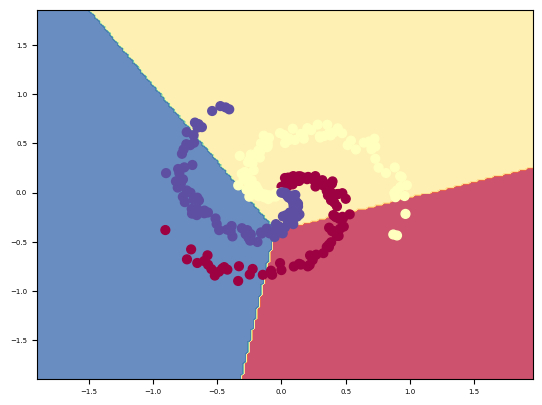

In [110]:
print("Best Model:")
best_classifier.summary()

best_classifier.show_classifier()

We next plot training/validation accuracy and model loss on seperate plots.

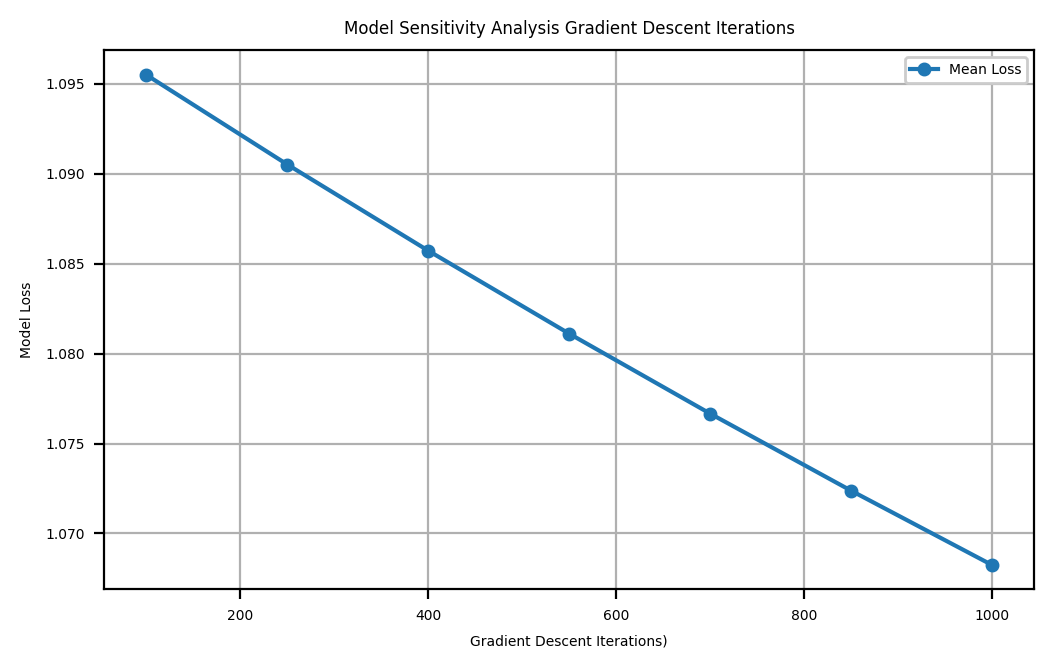

In [111]:
# plot learning rate sensitivity
fig, ax = plt.subplots(figsize=(6,3.5), dpi=200)

ax.plot(various_epochs,
        model_loss,
        label = r'Mean Loss',
        marker = 'o',
        markersize = 4)


ax.set_title("Model Sensitivity Analysis Gradient Descent Iterations")
ax.set_xlabel('Gradient Descent Iterations)')
ax.set_ylabel('Model Loss')
ax.legend()
ax.legend().get_frame().set_alpha(1.0)
ax.grid(True)

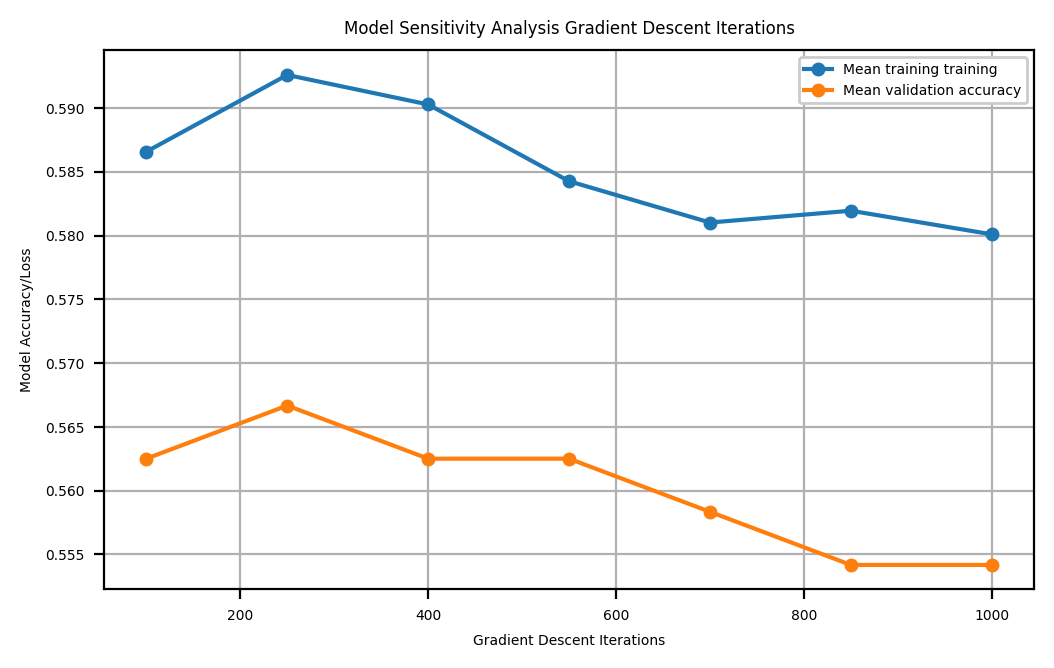

In [112]:
# plot learning rate sensitivity
fig, ax = plt.subplots(figsize=(6,3.5), dpi=200)

ax.plot(various_epochs,
        model_training_accuraccies,
        label = r'Mean training training',
        marker = 'o',
        markersize = 4)

ax.plot(various_epochs,
        model_validation_accuraccies,
        label = r'Mean validation accuracy',
        marker = 'o',
        markersize = 4)

ax.set_title("Model Sensitivity Analysis Gradient Descent Iterations")
ax.set_xlabel('Gradient Descent Iterations')
ax.set_ylabel('Model Accuracy/Loss')
ax.legend()
ax.legend().get_frame().set_alpha(1.0)
ax.grid(True)

Change in model sensitivity w.r.t. gradient descent iterations shows an increase in mean validation acuracy up to 250 iterations. Past this point validation and training accuracy appears to degrade. For this reason the number of iterations `250` is the selected to be the best candidate, offering the best training and validation accuracy without unnecessary computational cost and loss of accuracy.

#### `l2` Regularization Sensitivity

We will retain the best hyperparameters for the linear mode `lr = 1-e3` and `epochs = 250` for this next sensitivy analysis, while testing the effects of different `l2` values including `0.0` (no `l2` regularization).

In [113]:
# initialize parameters for the linear classifier iterations
lr = 1e-3
epochs = 250
l2_values = np.append(np.geomspace(1e-1, 1e-5, 5), [0], axis = 0)

# instantiate LeaveOneOut object for CV
kf = KFold(n_splits = 10, shuffle = True, random_state=2)

# initialize tracking objects for each linear classifier
model_training_accuraccies = []
model_validation_accuraccies = []
model_loss = []

# best model tracking
best_accuracy = 0.0

# run first loop to iterate through learning rates
for l2 in l2_values:
    # tracking objects
    training_history = []
    validation_history = []
    loss_history = []

    # begin CV loop
    for i, (train_index, validation_index) in enumerate(kf.split(X_train)):

        # instatiate new LinearClassifier object with cv split data
        cv_classifier = LinearClassifier(X_train[train_index], y_train[train_index], W, b, lr, epochs, l2)
        cv_classifier.start(verbose = False)

        # obtain tracking metrics
        training_accuracy = cv_classifier.eval(X_train[train_index], y_train[train_index])
        validation_accuracy = cv_classifier.eval(X_train[validation_index], y_train[validation_index])
        loss = cv_classifier.loss

        # update best model
        if training_accuracy > best_accuracy:
            best_accuracy = training_accuracy
            best_classifier = cv_classifier

        # append metrics
        training_history.append(training_accuracy)
        validation_history.append(validation_accuracy)
        loss_history.append(loss)

    # return mean values
    mean_cv_training = np.mean(training_history)
    mean_cv_validation = np.mean(validation_history)
    mean_cv_loss = np.mean(loss_history)

    # append mean metrics to overall tracking
    model_training_accuraccies.append(mean_cv_training)
    model_validation_accuraccies.append(mean_cv_validation)
    model_loss.append(mean_cv_loss)

Best Model:
Model summary:

W:
[[ 0.01741403  0.01463414 -0.02377698]
 [-0.01890681  0.02058674 -0.00483719]]

B:
[[0.0676665  0.08093004 0.07273069]]

Learning Rate: 0.001
l2 Regularization: 0.1
Epochs: 250

Training Accuracy: 0.625
Model Loss: 1.090378951582681


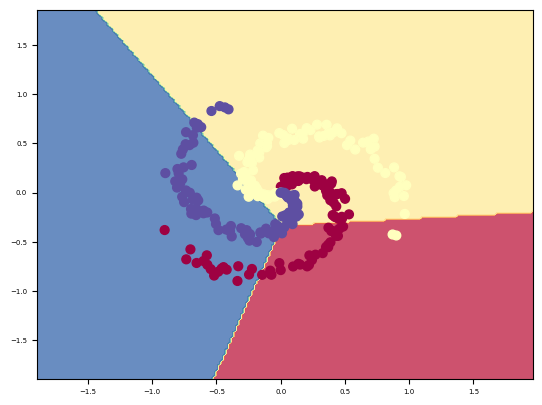

In [114]:
print("Best Model:")
best_classifier.summary()

best_classifier.show_classifier()

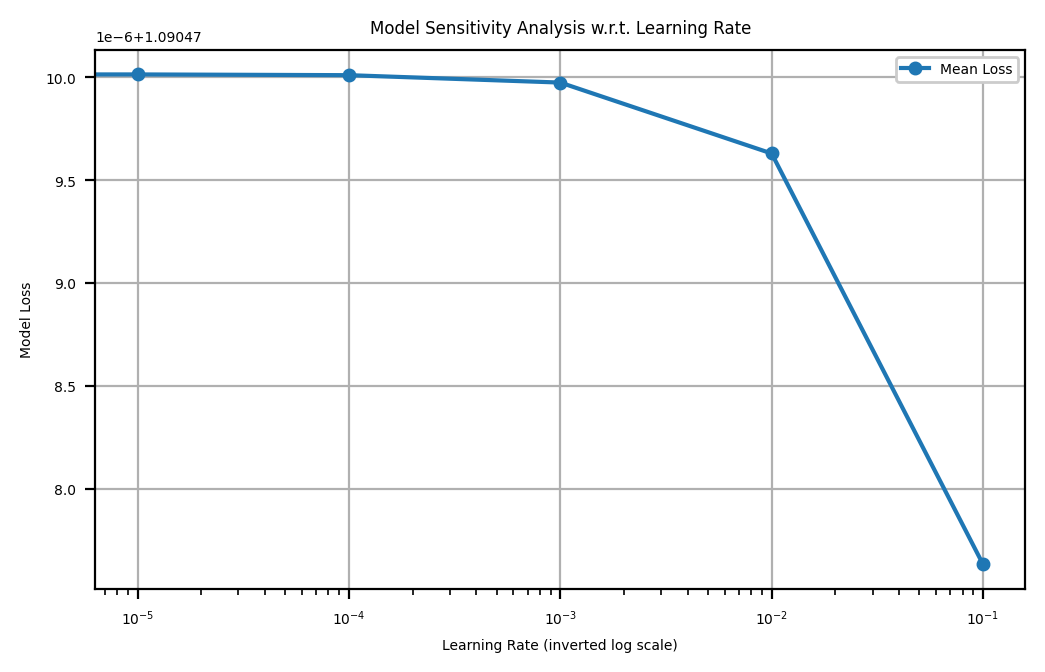

In [115]:
# plot learning rate sensitivity
fig, ax = plt.subplots(figsize=(6,3.5), dpi=200)

ax.plot(l2_values,
        model_loss,
        label = r'Mean Loss',
        marker = 'o',
        markersize = 4)

ax.set_title("Model Sensitivity Analysis w.r.t. Learning Rate")
ax.set_xlabel('Learning Rate (inverted log scale)')
ax.set_xscale("log")
#ax.invert_xaxis()
ax.set_ylabel('Model Loss')
ax.legend()
ax.legend().get_frame().set_alpha(1.0)
ax.grid(True)

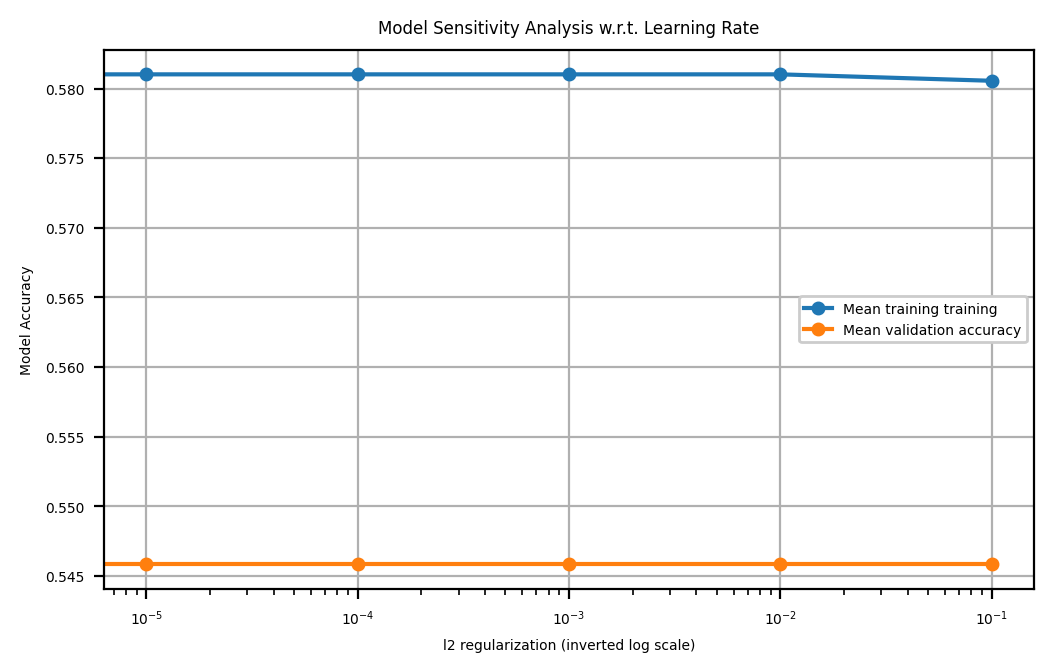

In [116]:
# plot learning rate sensitivity
fig, ax = plt.subplots(figsize=(6,3.5), dpi=200)

ax.plot(l2_values,
        model_training_accuraccies,
        label = r'Mean training training',
        marker = 'o',
        markersize = 4)

ax.plot(l2_values,
        model_validation_accuraccies,
        label = r'Mean validation accuracy',
        marker = 'o',
        markersize = 4)

'''
ax.plot(l2_values,
        model_loss,
        label = r'Mean Loss')
'''

ax.set_title("Model Sensitivity Analysis w.r.t. Learning Rate")
ax.set_xlabel('l2 regularization (inverted log scale)')
ax.set_xscale("log")
#ax.invert_xaxis()
ax.set_ylabel('Model Accuracy')
ax.legend()
ax.legend().get_frame().set_alpha(1.0)
ax.grid(True)

Varying `l2` regularization prameters appears to have minimal effects on the linear classifier model. For values of $ l2 \in [0,10^{-5}] $ there was no change in mean training and validation accuracy. FOr this reason, `l2` is selected to be `0.0` as an input parameter in order to minimize computational cost.

#### Train Test Split Sensitivity

The above sensitivity analysis returned the following optimal hyperparameters for the linear classifier model:
- Learning Rate: `lr = 1e-3`
- Gradient Descent Iterations: `epochs = 250`
- Regularization: `l2 = 0.0`

We then use these hyperparameters to analyze the sensitivity of the model w.r.t. train/test splits.

In [117]:
# specifiy train test splits in a list and iterate through splits
splits = [0.1, 0.2, 0.3, 0.4, 0.5]

# intialize best hyperparameters for linear classifier
# l2 regularliztion = 0.0 default for class constructor
lr = 1e-3
epochs = 250

# reload X and y data from the pickle file
X = pickle.load(open('Misc_files/dataX.pickle','rb'))
y = pickle.load(open('Misc_files/dataY.pickle','rb'))

# random seed for reproducibility
np.random.seed(576)

# get Array W of shape (2, 3)
W = 0.01*np.random.randn(X.shape[1],max(y)+1)

# get Array K of shape (1, 3)
b = np.zeros((1, max(y)+1))

# initialize tracking objects for each linear classifier
model_training_accuraccies = []
model_validation_accuraccies = []
model_testing_accuracies = []
model_loss = []

# best model tracking
best_accuracy = 0.0

# loop through splits using 10 fold cross-validation
for split in splits:

    # generate new train test split for each iteration, adjust random state for each based on split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split, shuffle=True, random_state=int(split*100))

    # tracking objects
    training_history = []
    validation_history = []
    test_history = []
    loss_history = []

    # begin CV loop
    for i, (train_index, validation_index) in enumerate(kf.split(X_train)):

        # instatiate new LinearClassifier object with cv split data
        cv_classifier = LinearClassifier(X_train[train_index], y_train[train_index], W, b, lr, epochs)
        cv_classifier.start(verbose = False)

        # obtain tracking metrics
        training_accuracy = cv_classifier.eval(X_train[train_index], y_train[train_index])
        validation_accuracy = cv_classifier.eval(X_train[validation_index], y_train[validation_index])
        testing_accuracy = cv_classifier.eval(X_test, y_test)
        loss = cv_classifier.loss

        # update best model
        if training_accuracy > best_accuracy:
            best_accuracy = training_accuracy
            best_classifier = cv_classifier

        # append metrics
        training_history.append(training_accuracy)
        validation_history.append(validation_accuracy)
        test_history.append(testing_accuracy)
        loss_history.append(loss)

    # return mean values
    mean_cv_training = np.mean(training_history)
    mean_cv_validation = np.mean(validation_history)
    mean_cv_testing = np.mean(test_history)
    mean_cv_loss = np.mean(loss_history)

    # append mean metrics to overall tracking
    model_training_accuraccies.append(mean_cv_training)
    model_validation_accuraccies.append(mean_cv_validation)
    model_testing_accuracies.append(mean_cv_testing)
    model_loss.append(mean_cv_loss)


Best Model:
Model summary:

W:
[[ 0.01880898  0.01470664 -0.02396573]
 [-0.02503941  0.01722767 -0.00653695]]

B:
[[0.081869   0.07055378 0.06879078]]

Learning Rate: 0.001
l2 Regularization: 0.001
Epochs: 250

Training Accuracy: 0.6296296296296297
Model Loss: 1.0898555458957988


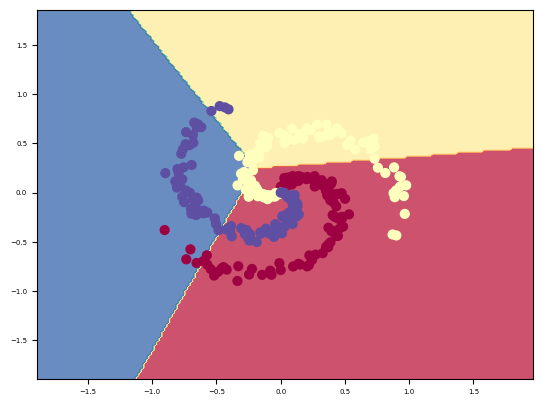

In [118]:
print("Best Model:")
best_classifier.summary()

best_classifier.show_classifier()

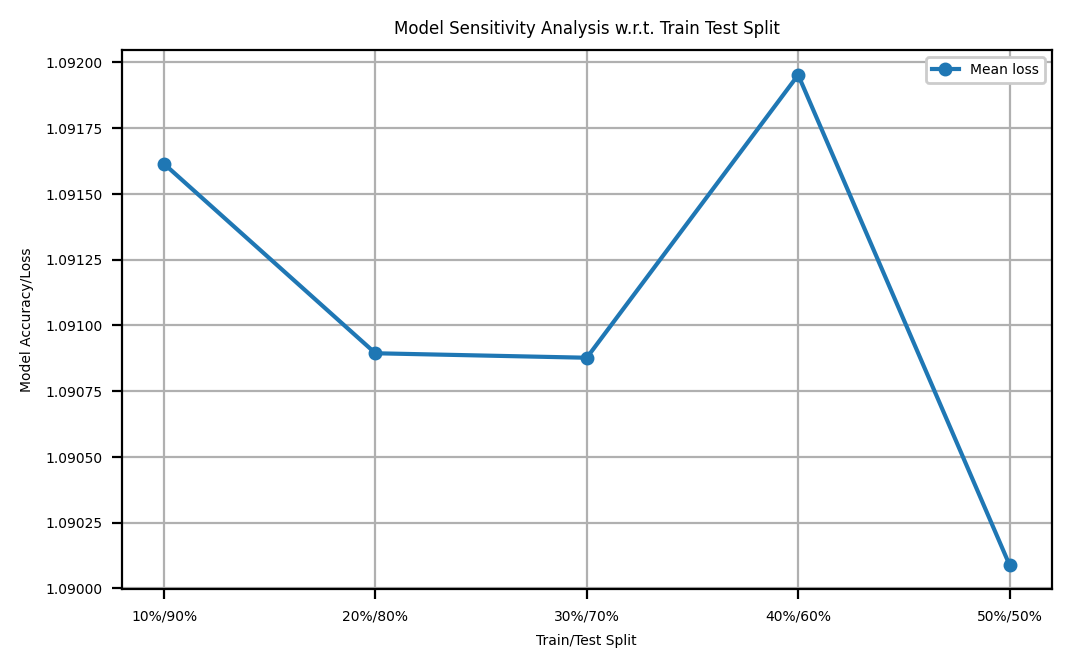

In [119]:
# plot train/test split sensitivity
fig, ax = plt.subplots(figsize=(6,3.5), dpi=200)

ax.plot(splits,
        model_loss,
        label = r'Mean loss',
        marker = 'o',
        markersize = 4)

ax.set_title("Model Sensitivity Analysis w.r.t. Train Test Split")
ax.set_xlabel('Train/Test Split')
ax.set_ylabel('Model Accuracy/Loss')
ax.legend()
ax.legend().get_frame().set_alpha(1.0)

ax.set_xticks(splits)  # Set x-axis tick positions
ax.set_xticklabels([f'{int(split * 100)}%/{100-int(split * 100)}%' for split in splits])  # Set tick labels with formatting

ax.grid(True)

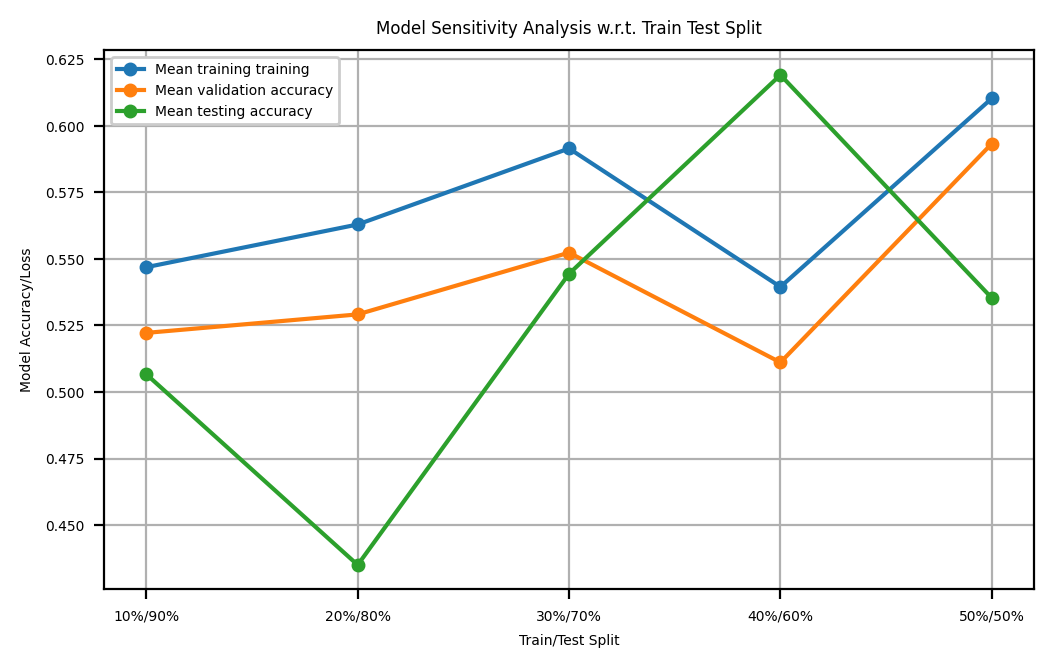

In [120]:
# plot train/test split sensitivity
fig, ax = plt.subplots(figsize=(6,3.5), dpi=200)

ax.plot(splits,
        model_training_accuraccies,
        label = r'Mean training training',
        marker = 'o',
        markersize = 4)

ax.plot(splits,
        model_validation_accuraccies,
        label = r'Mean validation accuracy',
        marker = 'o',
        markersize = 4)

ax.plot(splits,
        model_testing_accuracies,
        label = r'Mean testing accuracy',
        marker = 'o',
        markersize = 4)

ax.set_title("Model Sensitivity Analysis w.r.t. Train Test Split")
ax.set_xlabel('Train/Test Split')
ax.set_ylabel('Model Accuracy/Loss')
ax.legend()
ax.legend().get_frame().set_alpha(1.0)

ax.set_xticks(splits)  # Set x-axis tick positions
ax.set_xticklabels([f'{int(split * 100)}%/{100-int(split * 100)}%' for split in splits])  # Set tick labels with formatting

ax.grid(True)

## **5. Feed Forward Neural Networks**

### Data Loading and Preprocessing

We first download the [Fashion MNIST dataset](https://keras.io/api/datasets/fashion_mnist/) through their example code block:

In [121]:
# import tensorflow and keras
import tensorflow as tf
import keras

# load data and obtain description for labels
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

# label description
y_description = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Per the keras website:

"This is a dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images. This dataset can be used as a drop-in replacement for MNIST."

The classes have the following labels and desciptions:

Label|Description
|:---:|---|
0|T-shirt/top
1|Trouser
2|Pullover
3|Dress
4|Coat
5|Sandal
6|Shirt
7|Sneaker
8|Bag
9|Ankle boot

We first plot a selection of the training data for visual analysis. This [website (geeksforgeeks.org)](https://www.geeksforgeeks.org/fashion-mnist-with-python-keras-and-deep-learning/#) was used for reference.

Training Data Shape: (60000, 28, 28)
Testing Data Shape: (10000, 28, 28)


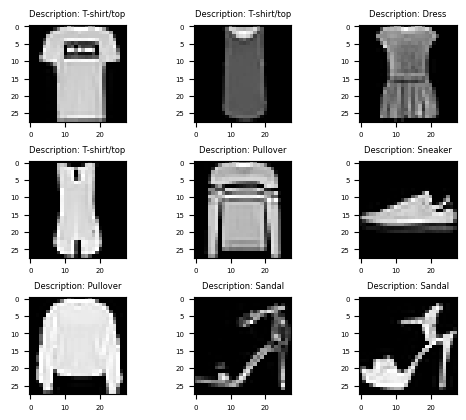

In [122]:
# obtain data summary
for i in range(1,10):

    plt.subplot(3,3,i)
    plt.title("Description: "+y_description[y_train[i]])

    plt.imshow(x_train[i], cmap = plt.get_cmap('gray'))

plt.subplots_adjust(wspace=0, hspace=0.4)

print(f"Training Data Shape: {x_train.shape}\n"+
      f"Testing Data Shape: {x_test.shape}")

We note that the input tensor contains values between 0 and 255, standard for grayscale images, so the data is normalized for model input.

In [123]:
# rescale tensor values between 0 and 1
x_train_model = x_train/255.
x_test_model = x_test/255.

### Model Construction and Architecture

We then construct the 2-layer feedforward neural network using the keras `Sequential()` class. We build the `model_arch()` function in such a way that we can specify the `units` and `activation` function of the resultant `Sequential()` model:

In [157]:
from keras import layers

# clear model
keras.backend.clear_session()

# construct model function for implementation
def model_arch(units = 64, activation = "ReLU"):

    # clear and instantiated models
    keras.backend.clear_session()

    # instantiate model
    model = keras.Sequential(name = f'units-{units}_activation-{activation}')

    # add model input
    model.add(keras.Input(shape = (28,28)))

    # flatten input of shape (28,28) into a vector
    model.add(layers.Flatten())

    # add first hidden layer, a naive number of units has been selected as 64 in addition to "relu" activation as default
    model.add(layers.Dense(name = "hidden_layer", units = 64))

    if activation == "ReLU":
        model.add(layers.ReLU())
    elif activation == "LeakyReLU":
        model.add(layers.LeakyReLU())


    # output layer corresponding to the 10 object labels
    model.add(layers.Dense(name = "output_layer", units = 10, activation = "softmax"))

    # the input shape of our data is 28x28,
    return model



Next we instatiate a `model_arch()` instance and inspect its architecture with the `summary()` method. Note that we can also see the activation function for the hidden unti:

In [164]:
model = model_arch(64,"ReLU")
model.summary()

Model: "units-64_activation-ReLU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 hidden_layer (Dense)        (None, 64)                50240     
                                                                 
 re_lu (ReLU)                (None, 64)                0         
                                                                 
 output_layer (Dense)        (None, 10)                650       
                                                                 
Total params: 50890 (198.79 KB)
Trainable params: 50890 (198.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Model Compilation and Training

Training of the model begins following the assignment of an optimizer, loss function, and accuracy metric using the `compile()` method.

In [165]:
model.compile(optimizer=keras.optimizers.legacy.Adam(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['sparse_categorical_accuracy'],
              )


Finally, the model is fit to the training data using the `fit()` method where we specify the number of parameters, a validation split, and random shuffling of the training data. Model fitting results in the creation of a `history` object which we can subsequently use to evaluate the model.

In [166]:
history = model.fit(
    x_train_model.astype(np.float32), y_train,
    epochs=60,
    validation_split=0.2,
    shuffle = True
)

Epoch 1/60
1500/1500 [==============================] - 1s 644us/step - loss: 0.5421 - sparse_categorical_accuracy: 0.8114 - val_loss: 0.4339 - val_sparse_categorical_accuracy: 0.8453
Epoch 2/60
1500/1500 [==============================] - 1s 588us/step - loss: 0.4035 - sparse_categorical_accuracy: 0.8566 - val_loss: 0.3910 - val_sparse_categorical_accuracy: 0.8618
Epoch 3/60
1500/1500 [==============================] - 1s 607us/step - loss: 0.3675 - sparse_categorical_accuracy: 0.8684 - val_loss: 0.3738 - val_sparse_categorical_accuracy: 0.8683
Epoch 4/60
1500/1500 [==============================] - 1s 591us/step - loss: 0.3418 - sparse_categorical_accuracy: 0.8757 - val_loss: 0.3780 - val_sparse_categorical_accuracy: 0.8611
Epoch 5/60
1500/1500 [==============================] - 1s 596us/step - loss: 0.3247 - sparse_categorical_accuracy: 0.8812 - val_loss: 0.3484 - val_sparse_categorical_accuracy: 0.8752
Epoch 6/60
1500/1500 [==============================] - 1s 584us/step - loss: 0.

We can now observe the models training history w.r.t. validation and training accuracies and losses.

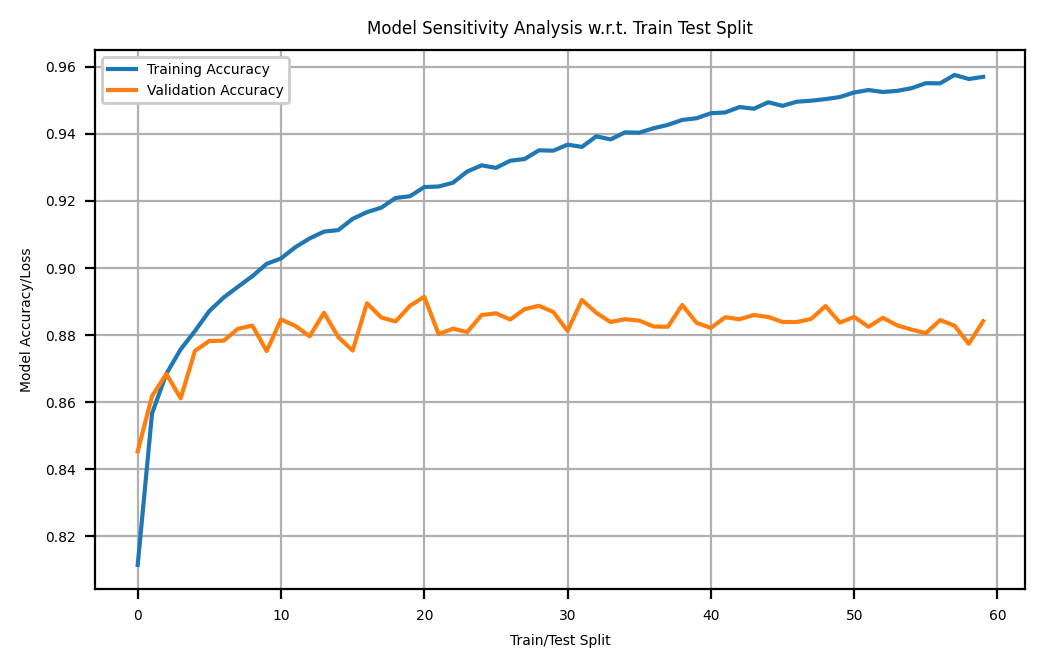

In [167]:
# plot training history
fig, ax = plt.subplots(figsize=(6,3.5), dpi=200)

ax.plot(history.history['sparse_categorical_accuracy'],
        label = r'Training Accuracy',
        #marker = 'o',
        markersize = 4)

ax.plot(history.history['val_sparse_categorical_accuracy'],
        label = r'Validation Accuracy',
        #marker = 'o',
        markersize = 4)

ax.set_title("Model Sensitivity Analysis w.r.t. Train Test Split")
ax.set_xlabel('Train/Test Split')
ax.set_ylabel('Model Accuracy/Loss')
ax.legend()
ax.legend().get_frame().set_alpha(1.0)

ax.grid(True)

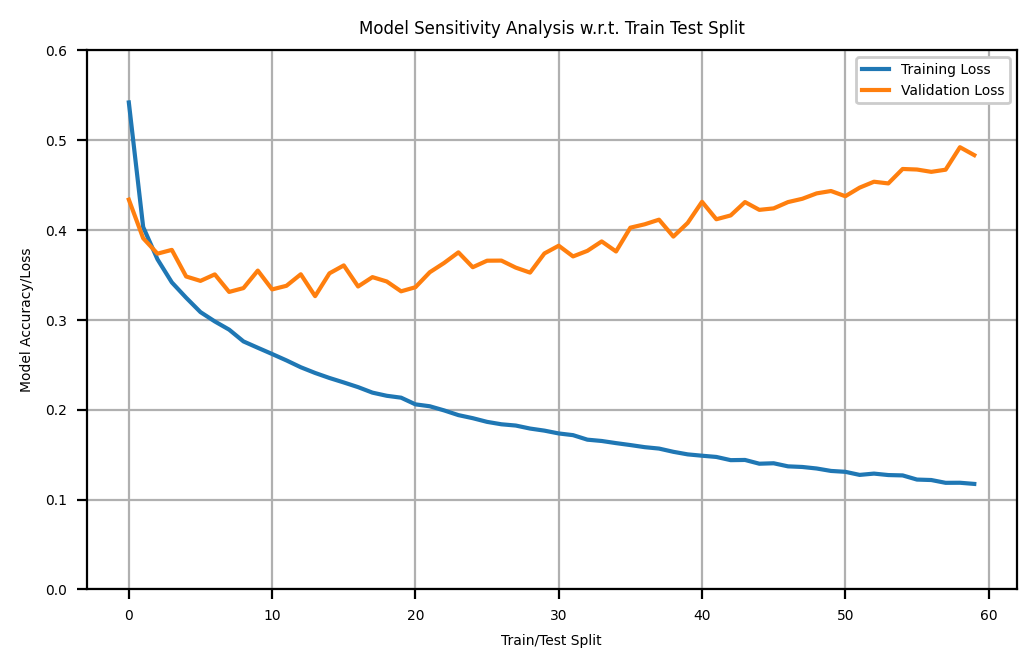

In [169]:
# plot loss history
fig, ax = plt.subplots(figsize=(6,3.5), dpi=200)

ax.plot(history.history['loss'],
        label = r'Training Loss',
        #marker = 'o',
        markersize = 4)

ax.plot(history.history['val_loss'],
        label = r'Validation Loss',
        #marker = 'o',
        markersize = 4)

ax.set_title("Model Sensitivity Analysis w.r.t. Train Test Split")
ax.set_xlabel('Train/Test Split')
ax.set_ylabel('Model Accuracy/Loss')
ax.set_ylim(0,0.6)
ax.legend()
ax.legend().get_frame().set_alpha(1.0)


ax.grid(True)

The above loss and accuracy plots  are a clear indicator of overfitting from the model. While training accuracy and loss improves with subseqent epochs, validation accuracy plateaus and validation loss appears to increase with subsequent epochs.

We can finally evaluate the test data using sci-kit learn's `accuracy_score()` method.

In [170]:
from sklearn.metrics import accuracy_score

predicted_softmax = model.predict(x_test.astype(np.float32))
y_pred = np.argmax(predicted_softmax, axis = 1)

accuracy_score(y_test, y_pred)

  1/313 [..............................] - ETA: 6s

313/313 [==============================] - 0s 300us/step


0.8405

The test accuracy of `0.XXX` (confirm this value after final model) is in line with the lower validation accuracy as described.

### Model Evaluation: leaky ReLU

We next evaulate the Fashion MNIST dataset using a similar model with the keras `LeakyReLU` activation. We can call the previously created `model_arch()` function with the approriate parameters to create this model.

In [172]:
# build identical model with LeakyREeLU activation
model = model_arch(64, "LeakyReLU")

# show model architecture
model.summary()

Model: "units-64_activation-LeakyReLU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 hidden_layer (Dense)        (None, 64)                50240     
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 64)                0         
                                                                 
 output_layer (Dense)        (None, 10)                650       
                                                                 
Total params: 50890 (198.79 KB)
Trainable params: 50890 (198.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


We then similarly compile and fit the new model.

In [173]:
# compile
model.compile(optimizer=keras.optimizers.legacy.Adam(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['sparse_categorical_accuracy'],
              )

# fit
history = model.fit(
    x_train_model.astype(np.float32), y_train,
    epochs=60,
    validation_split=0.2,
    shuffle = True
)

Epoch 1/60
1500/1500 [==============================] - 1s 655us/step - loss: 0.5353 - sparse_categorical_accuracy: 0.8139 - val_loss: 0.4599 - val_sparse_categorical_accuracy: 0.8278
Epoch 2/60
1500/1500 [==============================] - 1s 589us/step - loss: 0.4179 - sparse_categorical_accuracy: 0.8511 - val_loss: 0.3987 - val_sparse_categorical_accuracy: 0.8585
Epoch 3/60
1500/1500 [==============================] - 1s 606us/step - loss: 0.3825 - sparse_categorical_accuracy: 0.8631 - val_loss: 0.4047 - val_sparse_categorical_accuracy: 0.8544
Epoch 4/60
1500/1500 [==============================] - 1s 592us/step - loss: 0.3632 - sparse_categorical_accuracy: 0.8694 - val_loss: 0.3977 - val_sparse_categorical_accuracy: 0.8590
Epoch 5/60
1500/1500 [==============================] - 1s 612us/step - loss: 0.3469 - sparse_categorical_accuracy: 0.8751 - val_loss: 0.3612 - val_sparse_categorical_accuracy: 0.8737
Epoch 6/60
1500/1500 [==============================] - 1s 588us/step - loss: 0.

The `LeakyReLU` model training history is as follows:

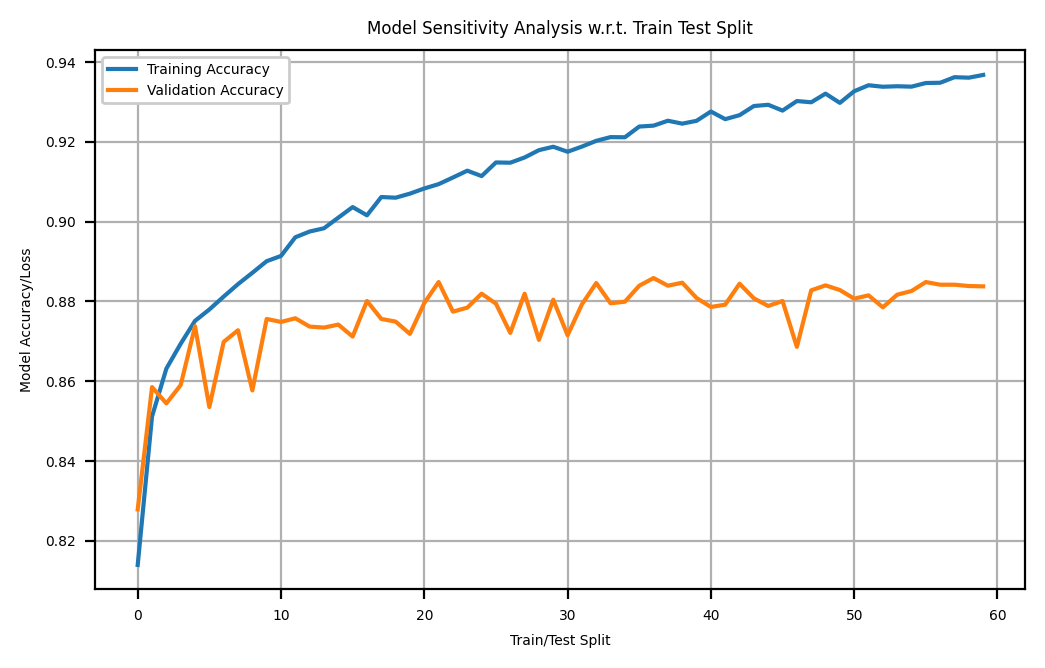

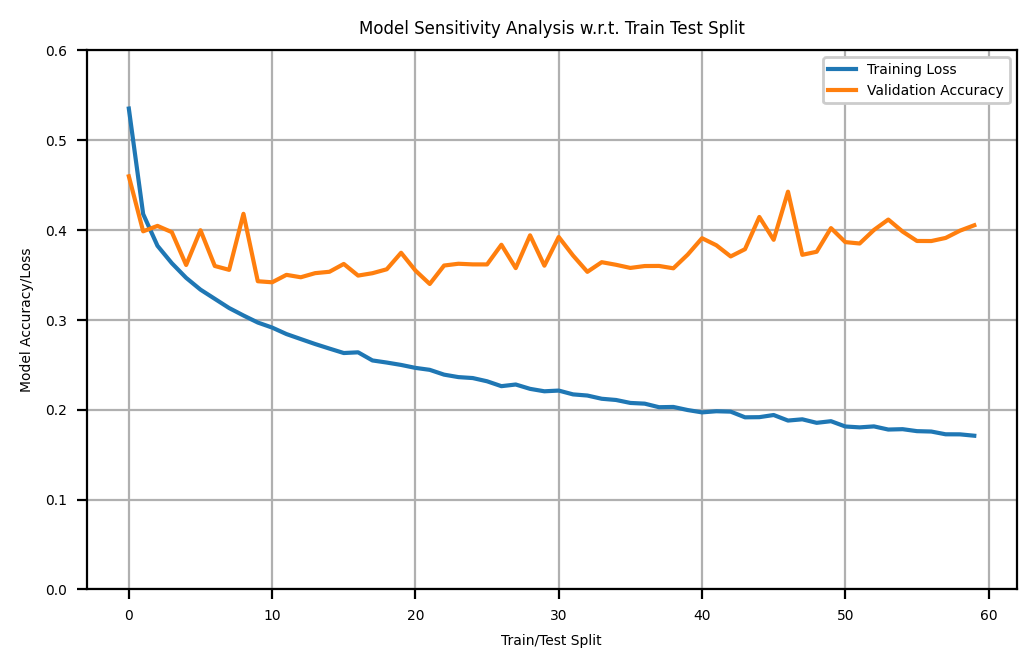

In [174]:
# plot training history
fig, ax = plt.subplots(figsize=(6,3.5), dpi=200)

ax.plot(history.history['sparse_categorical_accuracy'],
        label = r'Training Accuracy',
        #marker = 'o',
        markersize = 4)

ax.plot(history.history['val_sparse_categorical_accuracy'],
        label = r'Validation Accuracy',
        #marker = 'o',
        markersize = 4)

ax.set_title("Model Sensitivity Analysis w.r.t. Train Test Split")
ax.set_xlabel('Train/Test Split')
ax.set_ylabel('Model Accuracy/Loss')
ax.legend()
ax.legend().get_frame().set_alpha(1.0)

ax.grid(True)

# plot loss history
fig, ax = plt.subplots(figsize=(6,3.5), dpi=200)

ax.plot(history.history['loss'],
        label = r'Training Loss',
        #marker = 'o',
        markersize = 4)

ax.plot(history.history['val_loss'],
        label = r'Validation Accuracy',
        #marker = 'o',
        markersize = 4)

ax.set_title("Model Sensitivity Analysis w.r.t. Train Test Split")
ax.set_xlabel('Train/Test Split')
ax.set_ylabel('Model Accuracy/Loss')
ax.set_ylim(0,0.6)
ax.legend()
ax.legend().get_frame().set_alpha(1.0)


ax.grid(True)

In [175]:
predicted_softmax = model.predict(x_test.astype(np.float32))
y_pred = np.argmax(predicted_softmax, axis = 1)

accuracy_score(y_test, y_pred)

  1/313 [..............................] - ETA: 6s

313/313 [==============================] - 0s 314us/step


0.8368

The model utilizing `LeakyReLU` had a test accuracy of `0.8368`, comparable to the former model. Should a model be selected for further refinement or deployment, on the basis of activation function alone, the `LeakyReLU` model would be the preferred choice due to better loss history.

### Optimizer Choice Influence

From the [keras](https://keras.io/api/optimizers/) website there are a number of optimizers to to choose from for model architecture: